## explore MNIST image, PCA, Logistic Regression
ref: https://en.wikipedia.org/wiki/MNIST_database

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

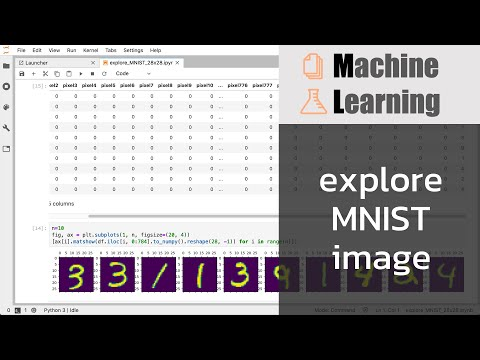

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('TTbARIMKaZM', width=720, height=405)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from PIL import Image
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.3.4
numpy   version = 1.20.3
seaborn version = 0.11.2


In [4]:
pd.Timestamp.now()

Timestamp('2022-10-03 19:00:16.137460')

## read MNIST data

In [5]:
data_file='https://github.com/prasertcbs/basic-dataset/raw/master/mnist_28x28_5000rows.csv.zip'
print(f'data_file: {data_file}')
df=pd.read_csv(data_file)
df.head()

data_file: https://github.com/prasertcbs/basic-dataset/raw/master/mnist_28x28_5000rows.csv.zip


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [6]:
28*28

784

$$x^2=784$$
$$x=\sqrt{784}$$
$$x=28$$

In [7]:
np.sqrt(784)

28.0

In [8]:
df.iloc[:, 0:784].head() # เอาทุก row , col ตั้งเเต่อันเเรกจนถึง 784

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df[df.columns[df.columns.str.startswith('pixel')]].head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.iloc[0, 0:784] # เอาทุก col เเต่เฉพาะเเถวเเรก

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 0, Length: 784, dtype: int64

In [11]:
df.iloc[0, 0:784].to_numpy()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   2,  59, 229, 25

In [12]:
np.set_printoptions(linewidth=1000)

In [13]:
df.iloc[100, 0:784].to_numpy().reshape(28, 28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13, 203, 218,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 203, 253, 238,  60,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  16,  95, 254, 253, 248, 118,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  19, 136, 253, 254, 249, 118,   0,   0

In [14]:
# cmap (colormap)
from IPython.display import IFrame
IFrame('https://matplotlib.org/tutorials/colors/colormaps.html', width=800, height=240)

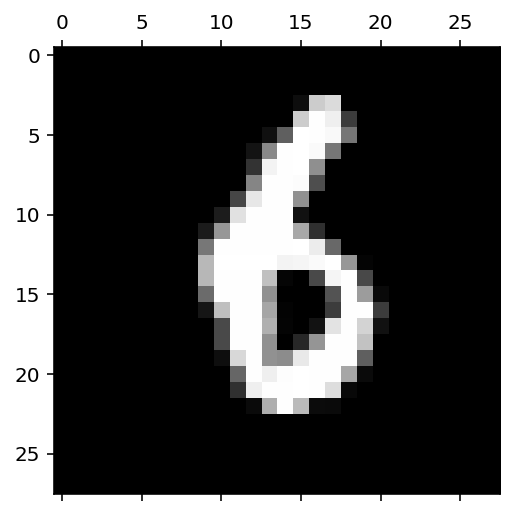

In [15]:
plt.matshow(df.iloc[100, 0:784].to_numpy().reshape(28, -1), cmap='gray'); 
# matshow --> display an array as a matrix in a new figure window
# reshape(28, -1) = reshape(28, 28)
# reshape(28, -1) --> ตัว -1 เป็นการให้กำหนดเองว่าจะเป็นกี่ col

In [16]:
df[:10]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


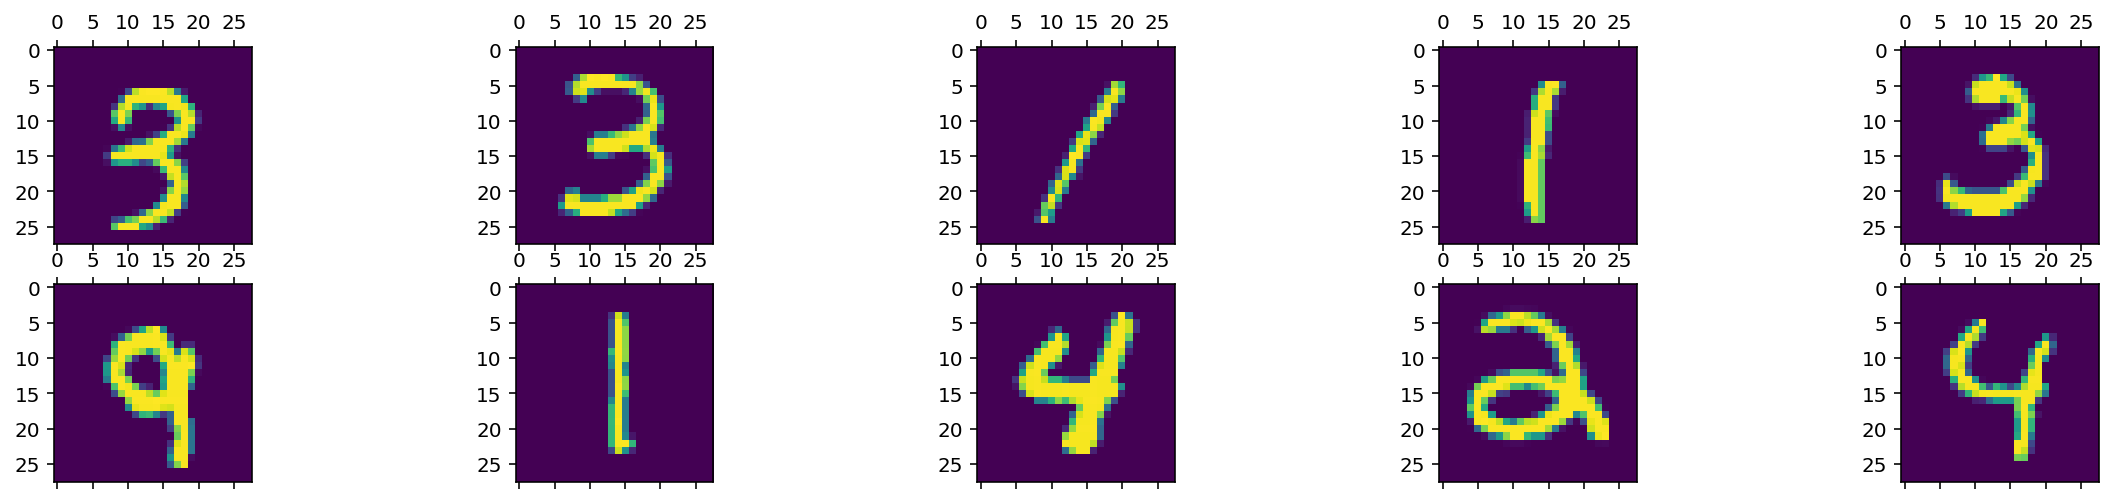

In [17]:
n=10
n_rows=2
n_cols=math.ceil(n / n_rows)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 4))
ax=ax.ravel()
[ax[i].matshow(df.iloc[i, 0:784].to_numpy().reshape(28, -1)) for i in range(n)];

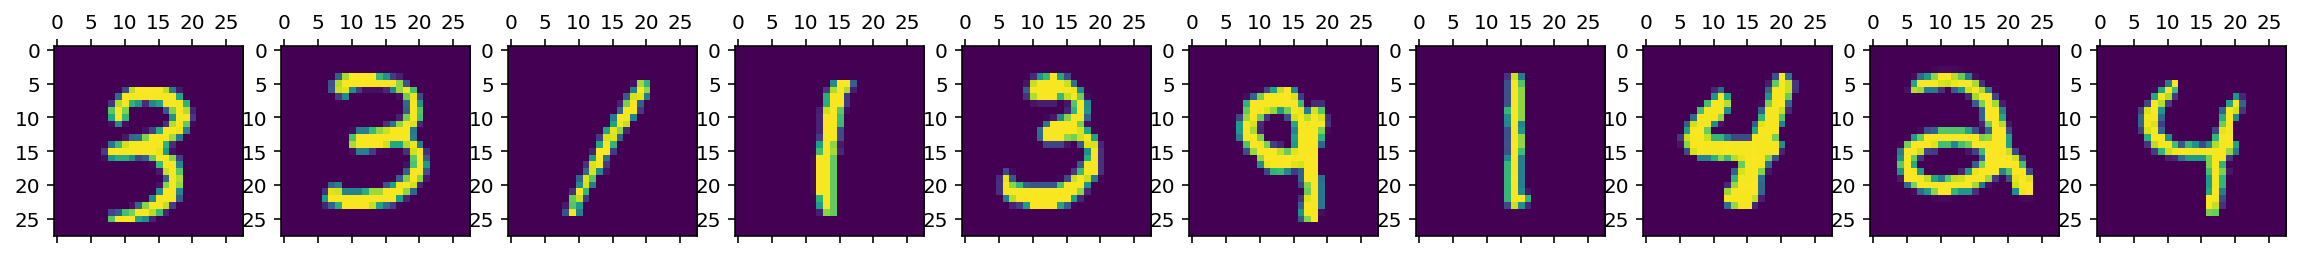

In [18]:
n=10
fig, ax = plt.subplots(1, n, figsize=(20, 4))
[ax[i].matshow(df.iloc[i, 0:784].to_numpy().reshape(28, -1)) for i in range(n)];

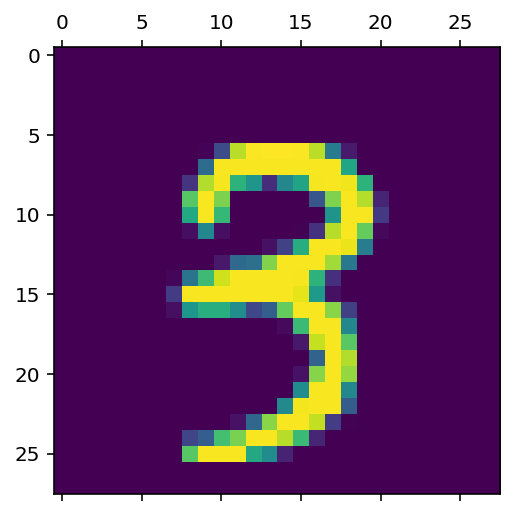

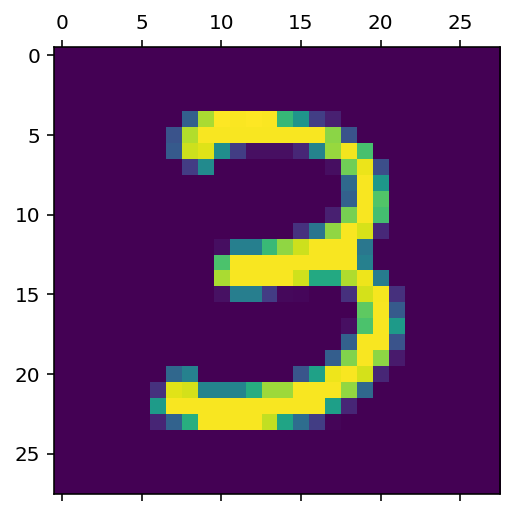

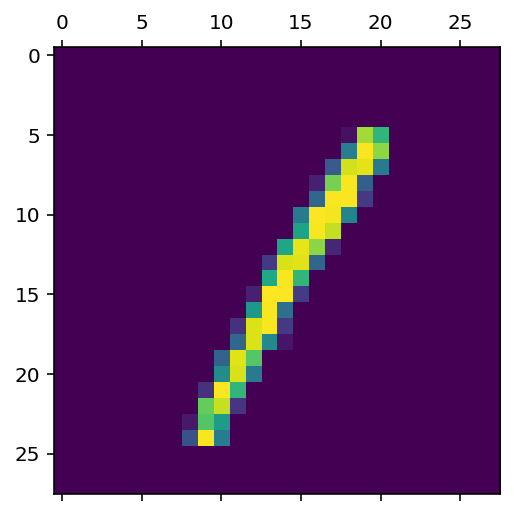

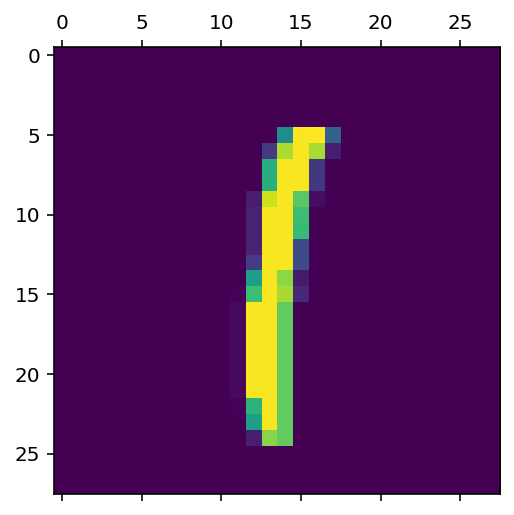

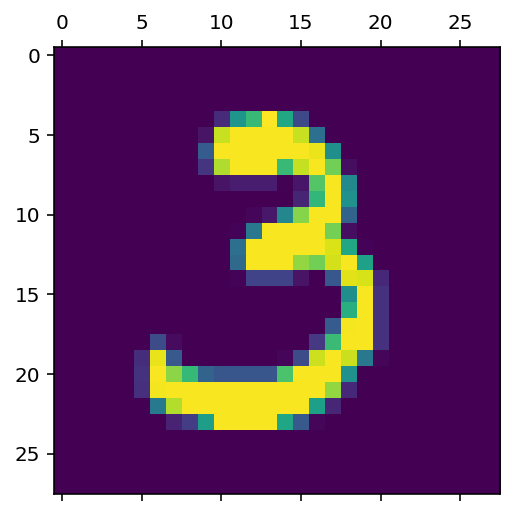

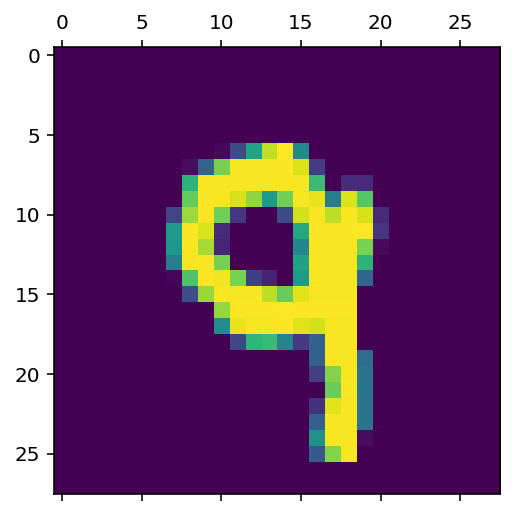

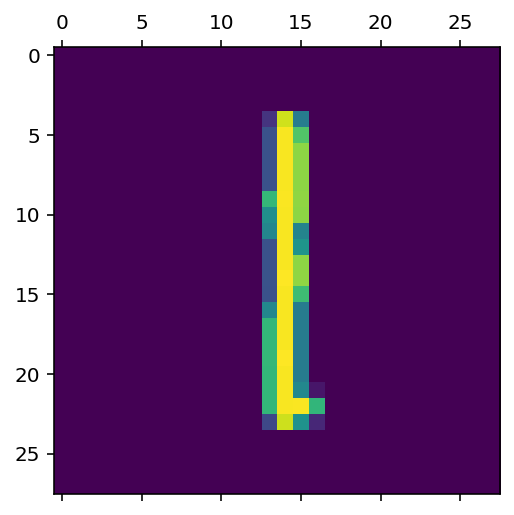

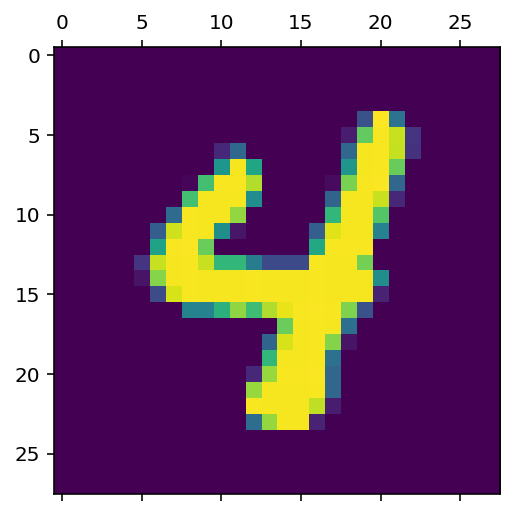

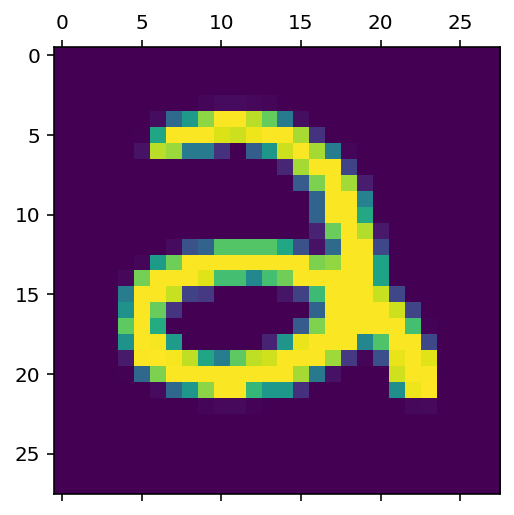

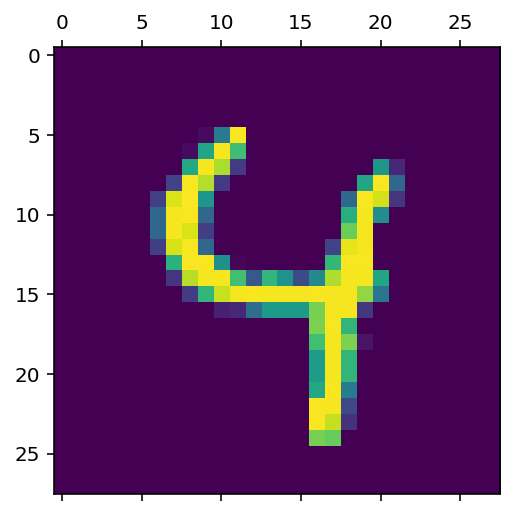

In [19]:
for i in range(10):
    plt.matshow(df.iloc[i, 0:784].to_numpy().reshape(28, -1))

In [20]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [21]:
df[df.columns[df.columns.str.startswith('pixel')]].head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df.drop(columns=['class']).head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df.drop(columns=['class']).iloc[1].to_numpy()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  78, 223, 255, 254, 255, 254, 171, 133,  47,  22,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  65, 226, 253, 253, 253, 253, 253, 253, 253, 253, 211,  65,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  72, 236, 243, 126,  46,  10,  10,  10,  27, 114, 216, 251, 181,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
   

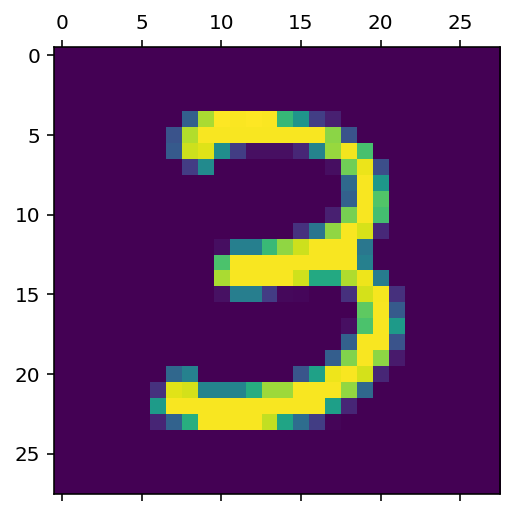

In [24]:
plt.matshow(df.drop(columns=['class']).iloc[1].to_numpy().reshape(28, -1));

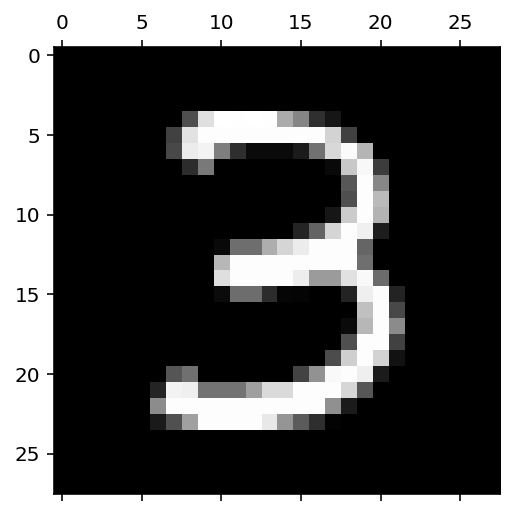

In [25]:
plt.matshow(df.drop(columns=['class']).iloc[1].to_numpy().reshape(28, -1), cmap='gray');

In [26]:
X=df.drop(columns=['class']).to_numpy()
print(f'shape = {X.shape}')

shape = (5000, 784)


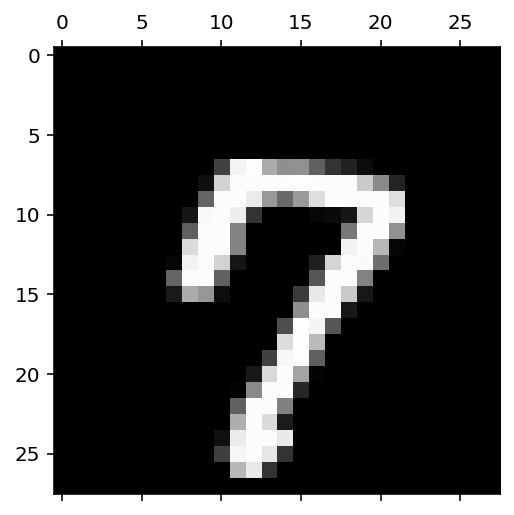

In [27]:
plt.matshow(X[55].reshape(28, -1), cmap='gray');

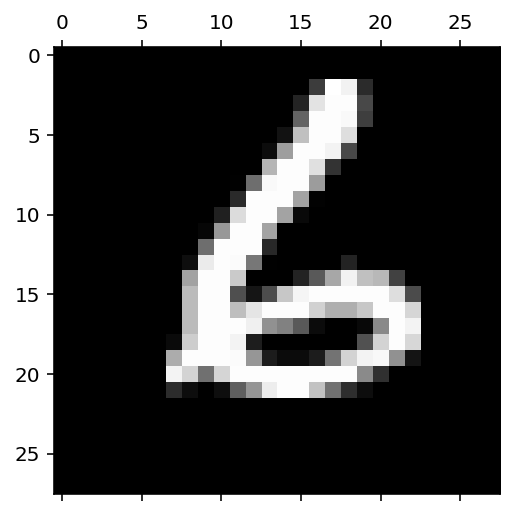

In [28]:
plt.matshow(X[51].reshape(28, -1), cmap='gray');

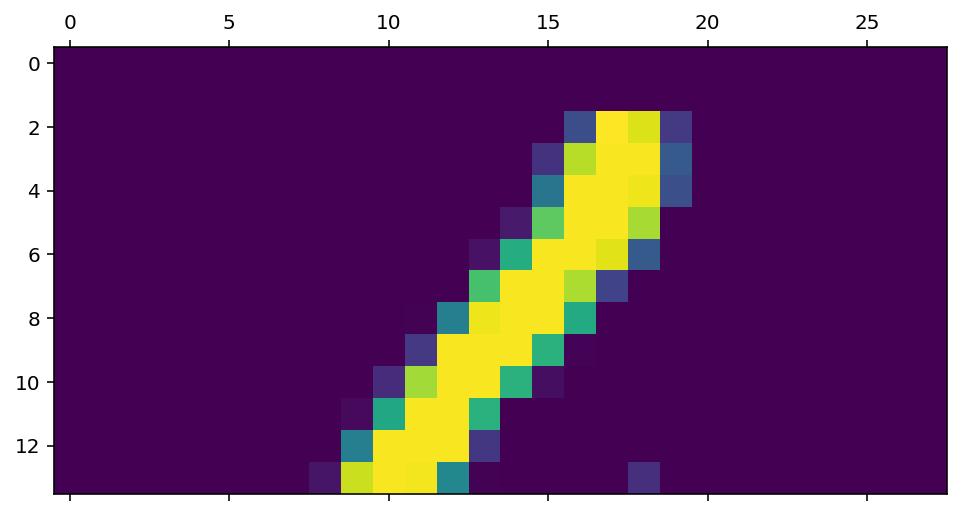

In [29]:
A=X[51].reshape(28, -1)
plt.matshow(A[:14]); # show เเค่ 14 เเถวเเรก

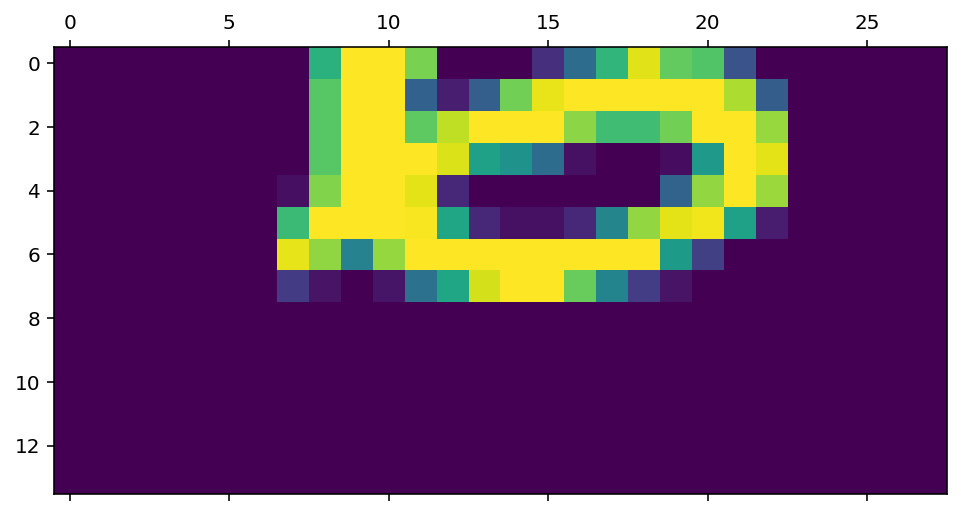

In [30]:
plt.matshow(A[14:]);

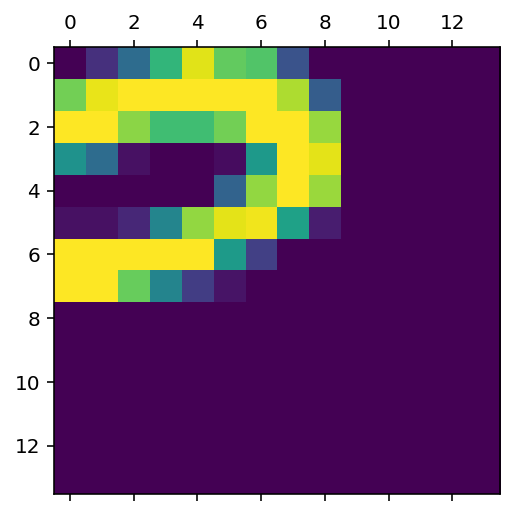

In [31]:
plt.matshow(A[14:, 14:]);

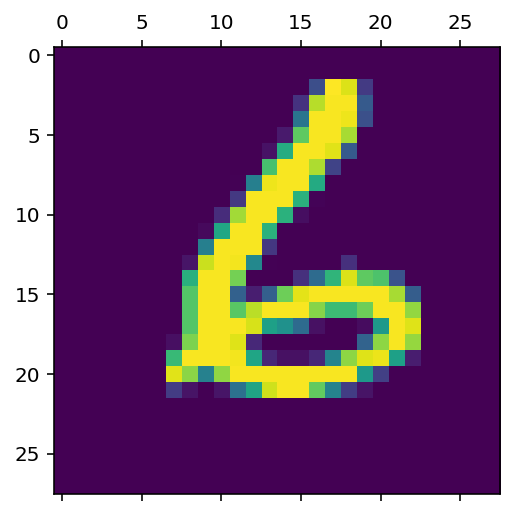

In [32]:
plt.matshow(X[51].reshape(28, -1));

## filter rows having 'class' = 9

In [33]:
digit=9
X=df[df.columns[df.columns.str.startswith('pixel')]][df['class']==digit].to_numpy()
# X=df[df['class']==digit].drop(columns=['class']).to_numpy()
print(f'shape = {X.shape}')
X[:5]

shape = (532, 784)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

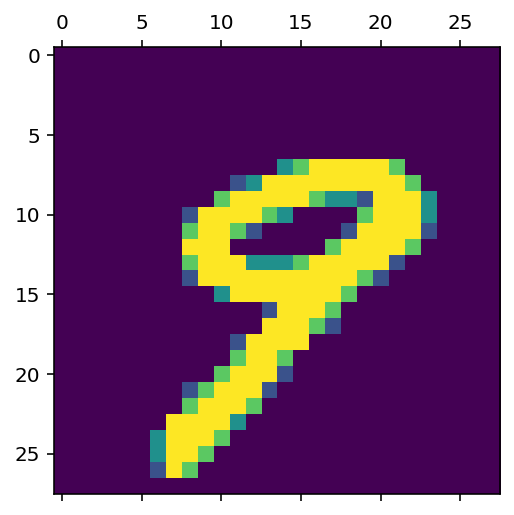

In [34]:
plt.matshow(X[100].reshape(28, -1));

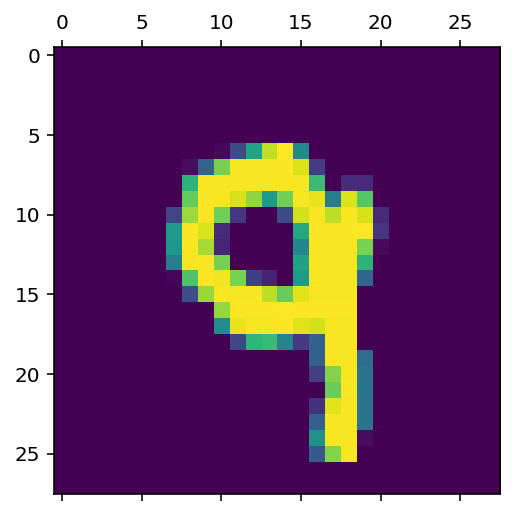

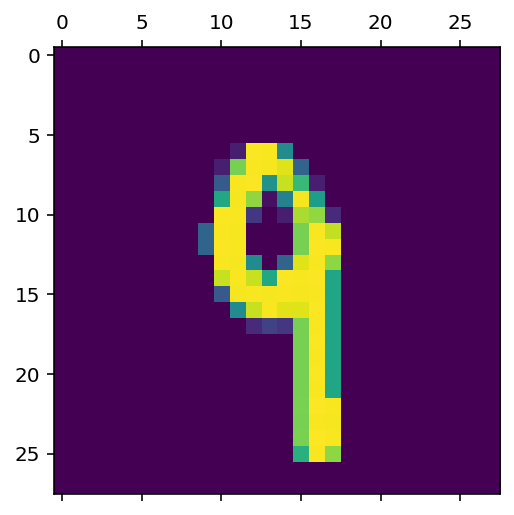

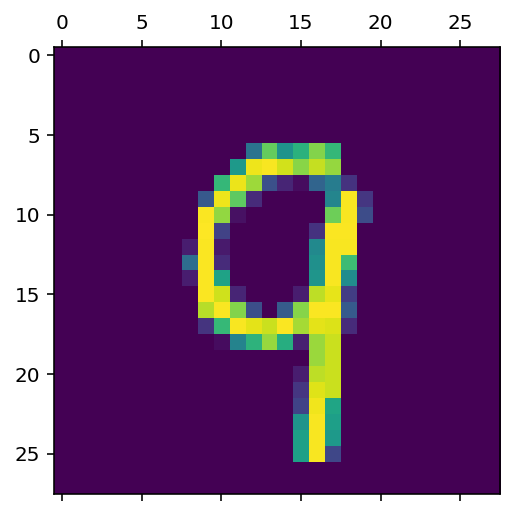

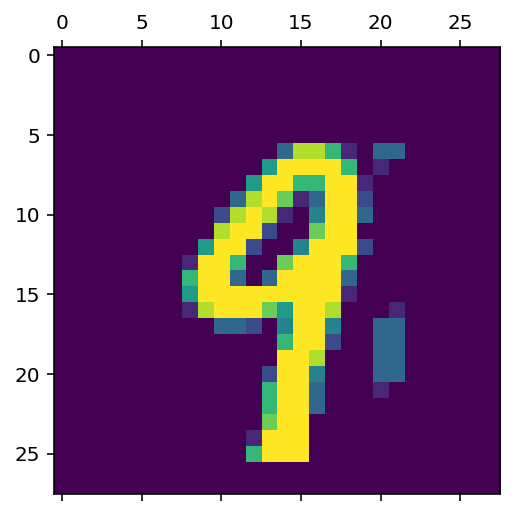

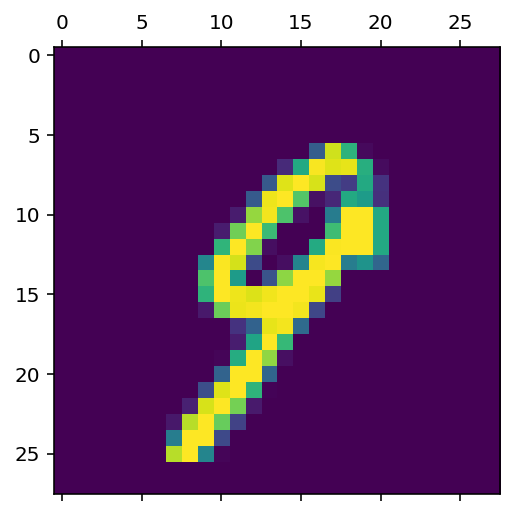

In [35]:
[plt.matshow(X[i].reshape(28, -1)) for i in range(5)];

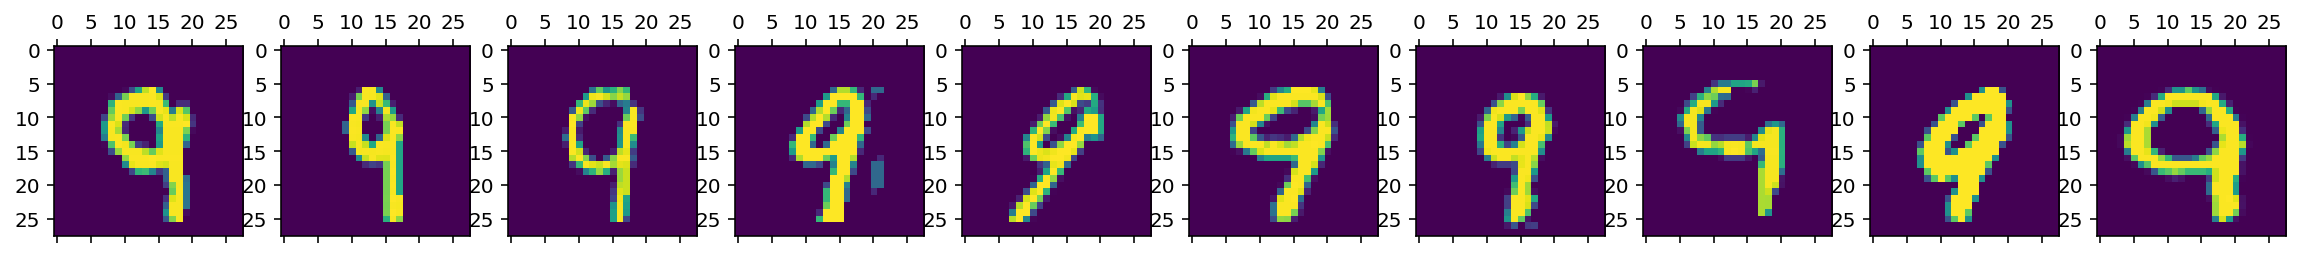

In [36]:
n=10
fig, ax = plt.subplots(1, n, figsize=(20, 4))
[ax[i].matshow(X[i].reshape(28, -1)) for i in range(n)];

In [37]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


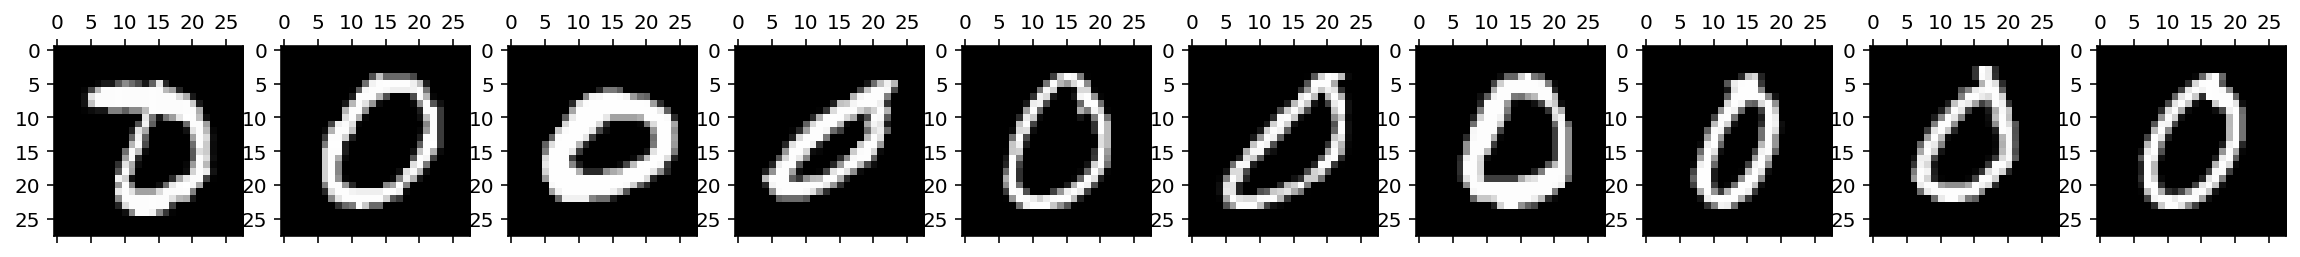

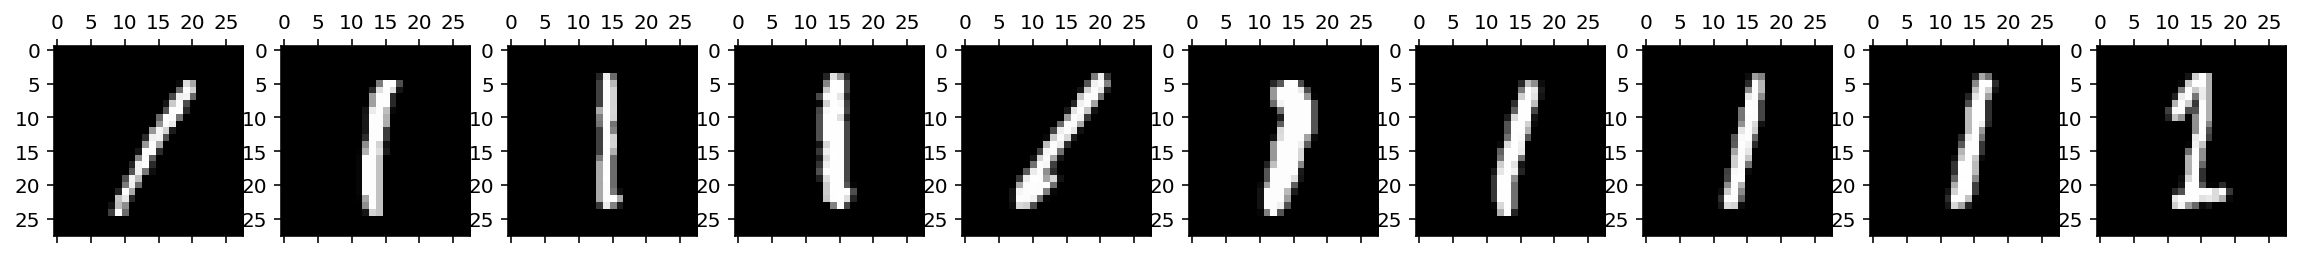

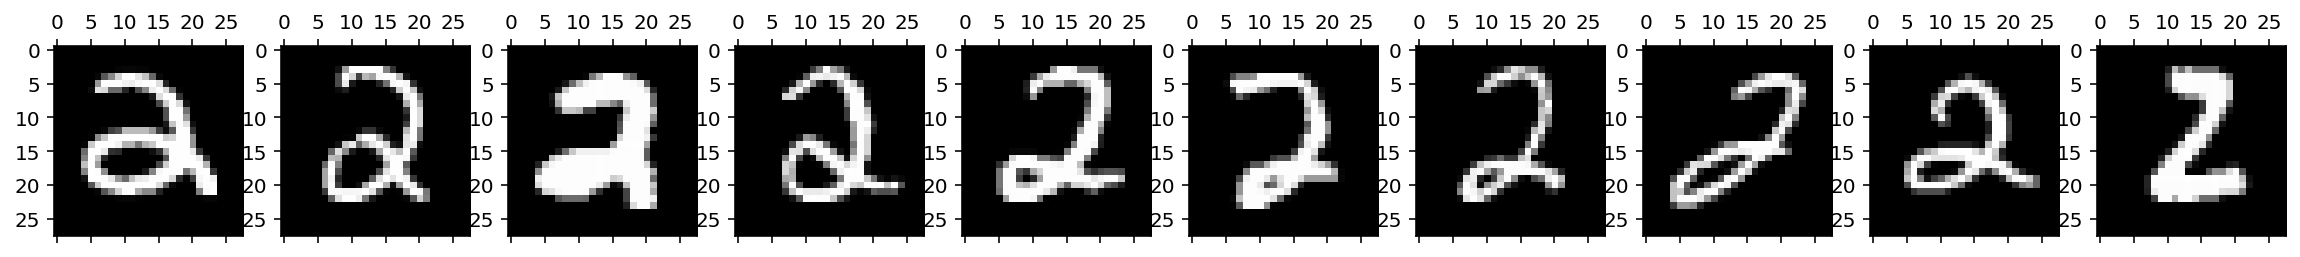

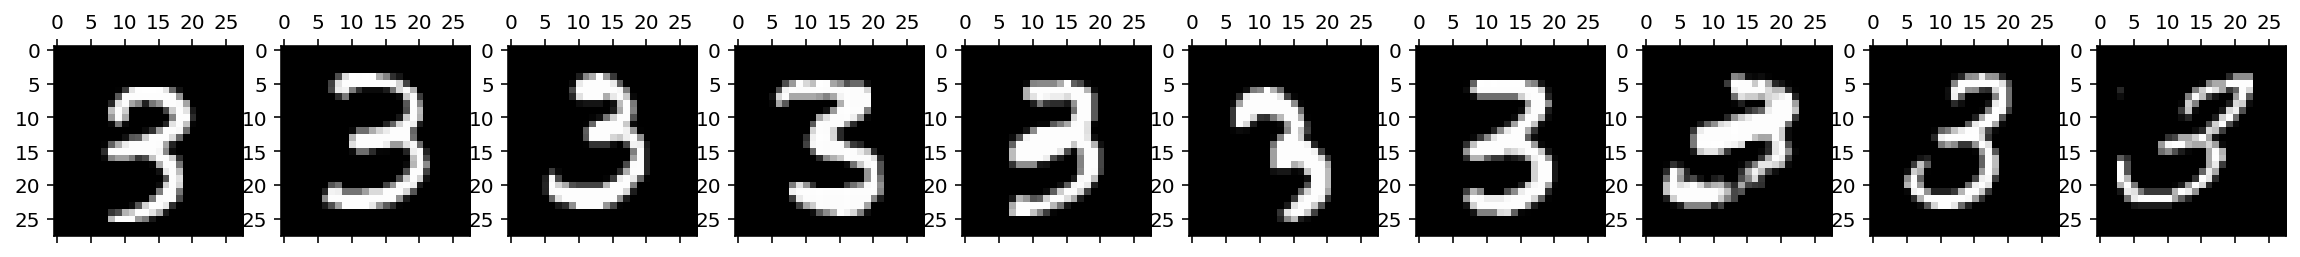

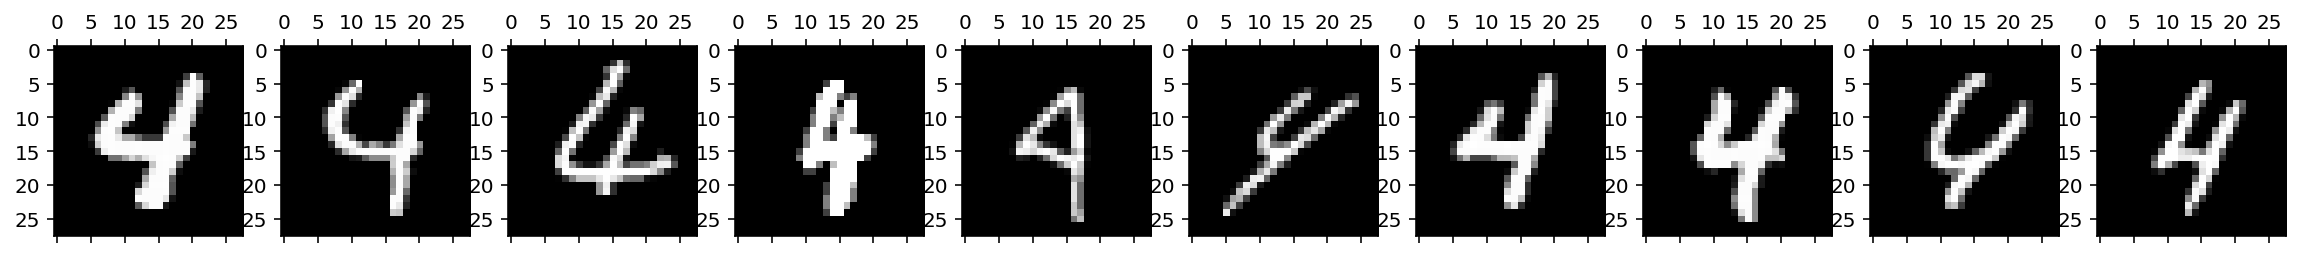

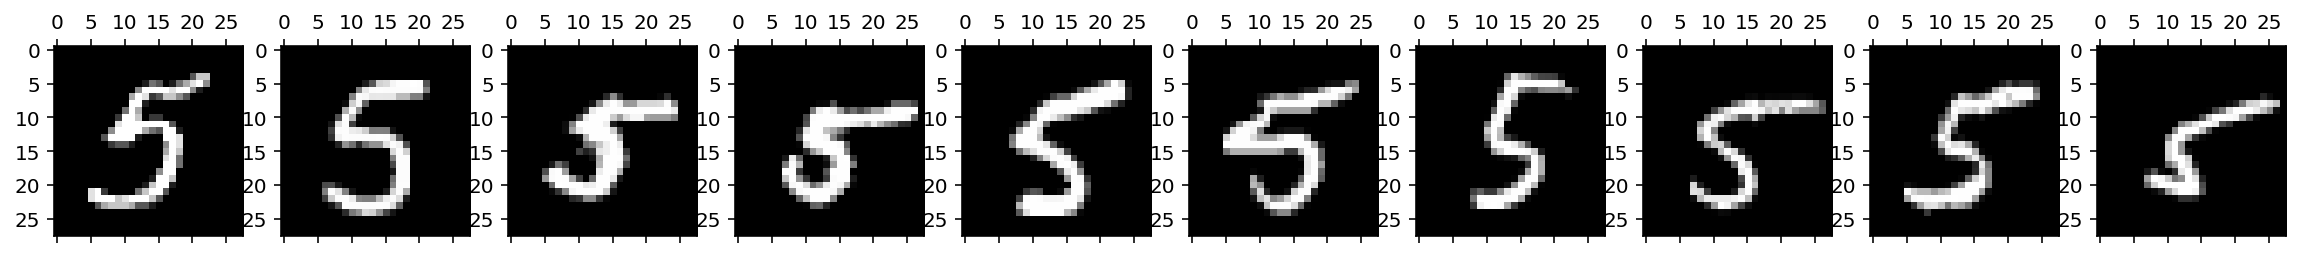

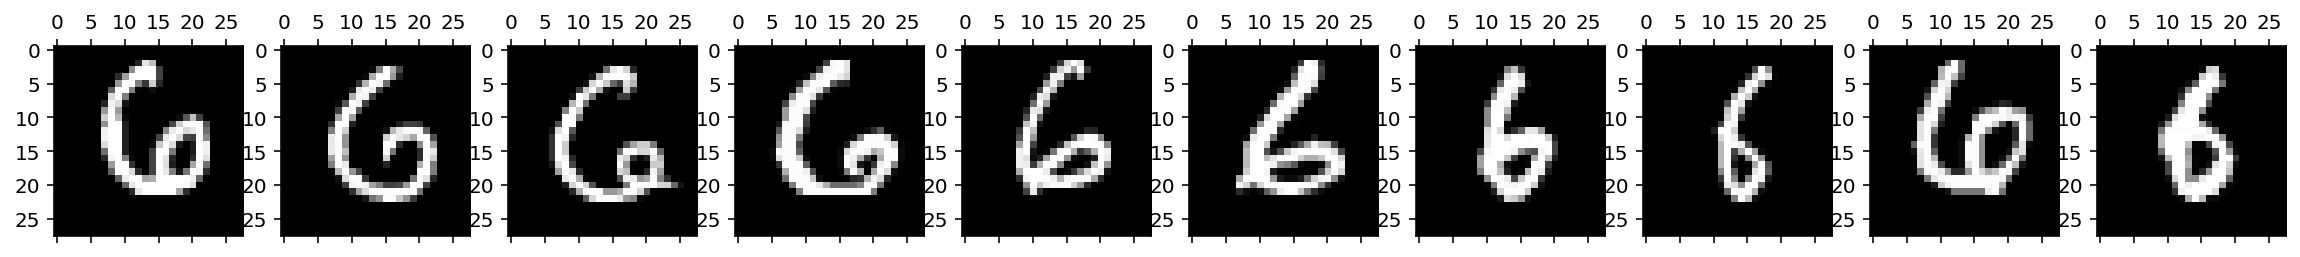

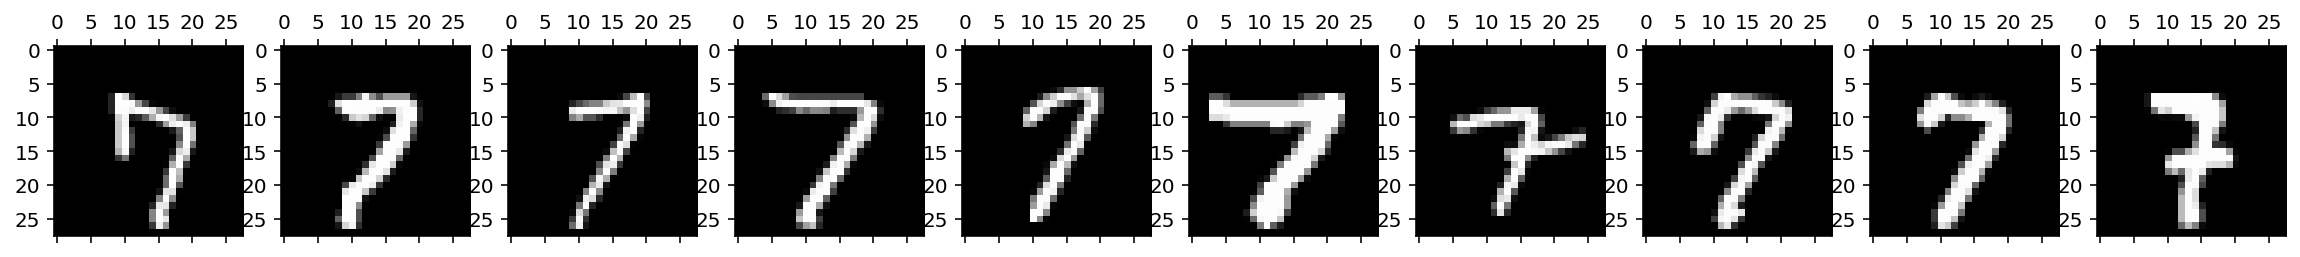

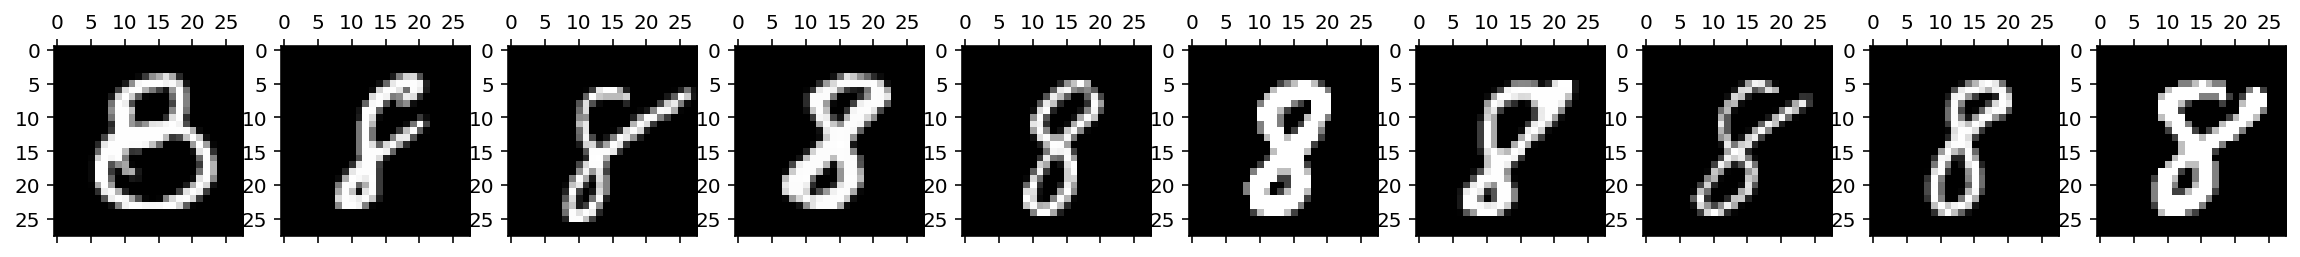

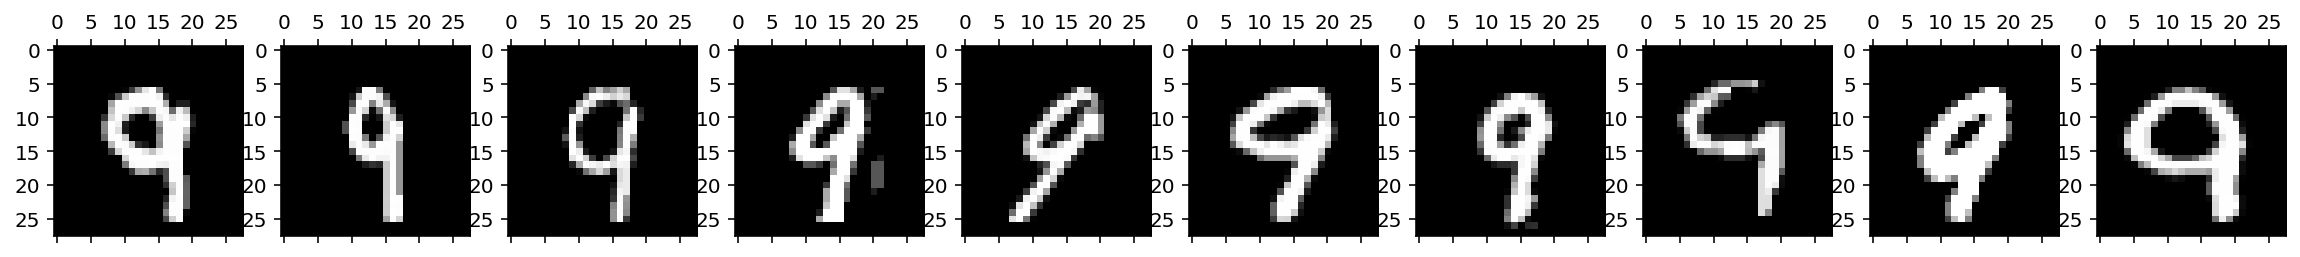

In [38]:
for digit in range(10):
    X=df[df.columns[df.columns.str.startswith('pixel')]][df['class']==digit].to_numpy()
#     print(f'shape = {X.shape}')
    n=10
    fig, ax = plt.subplots(1, n, figsize=(20, 2))
    [ax[i].matshow(X[i].reshape(28, -1), cmap='gray') for i in range(n)];

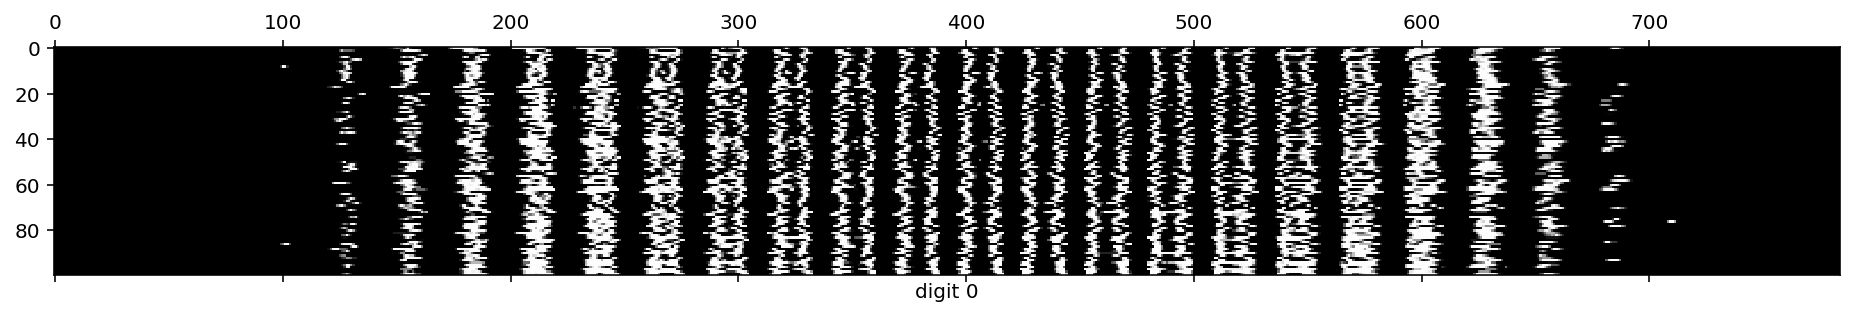

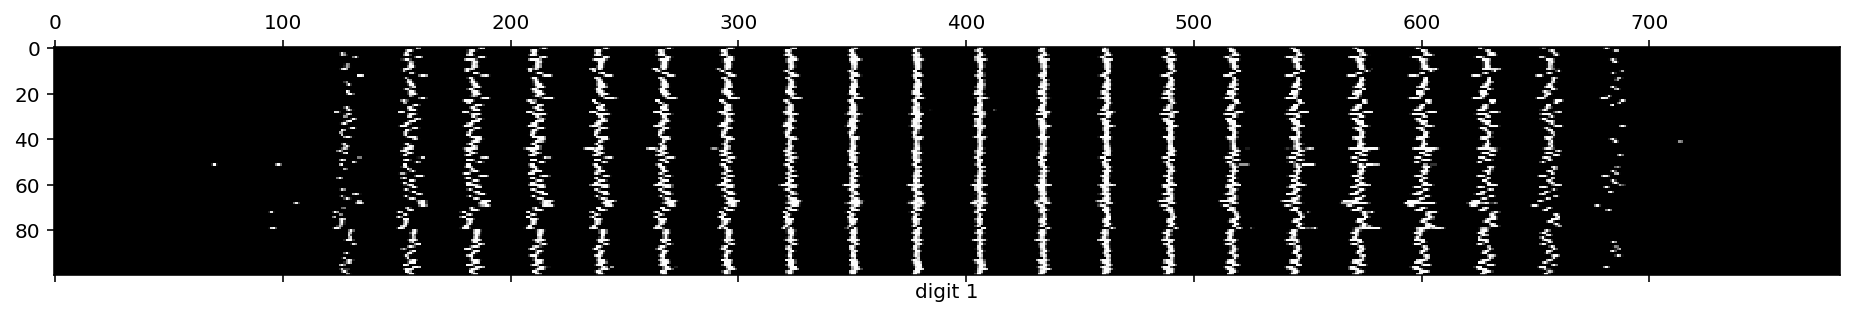

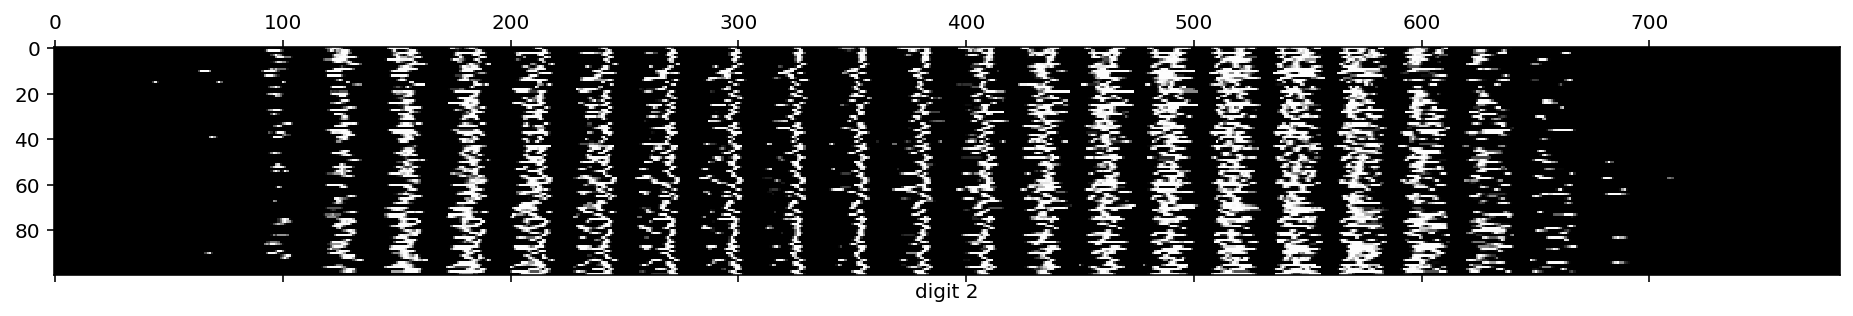

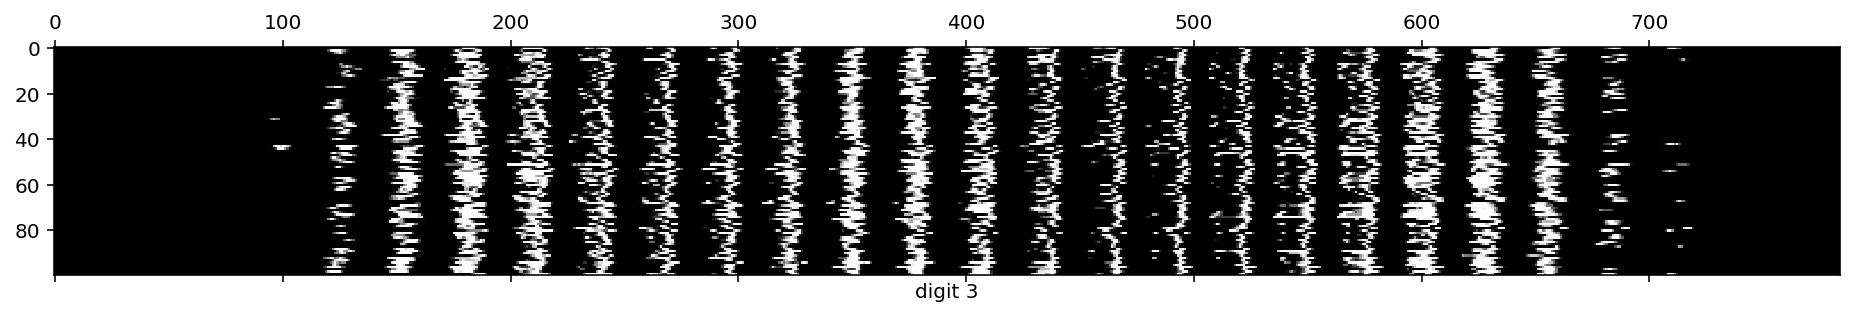

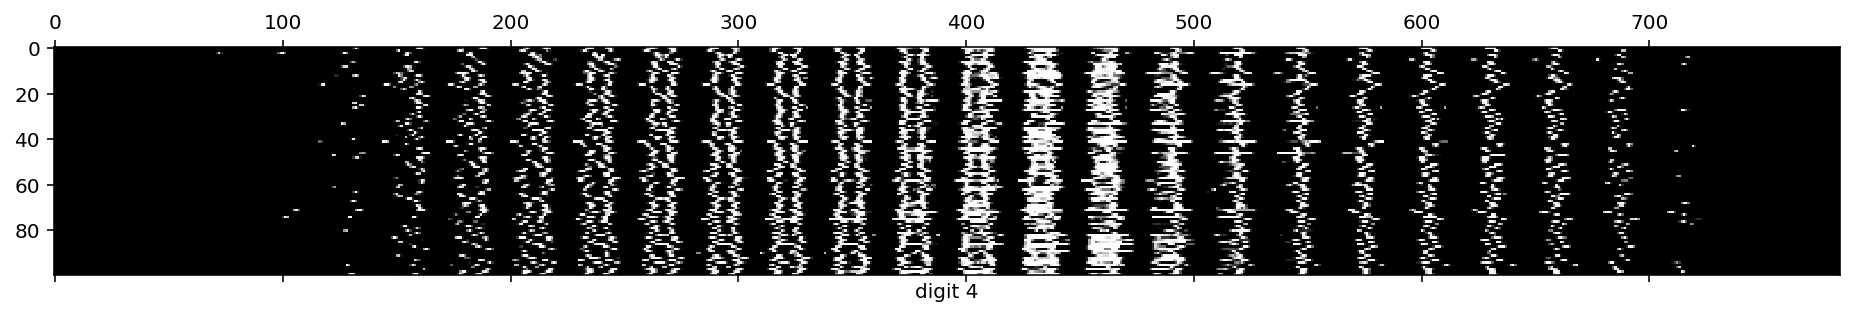

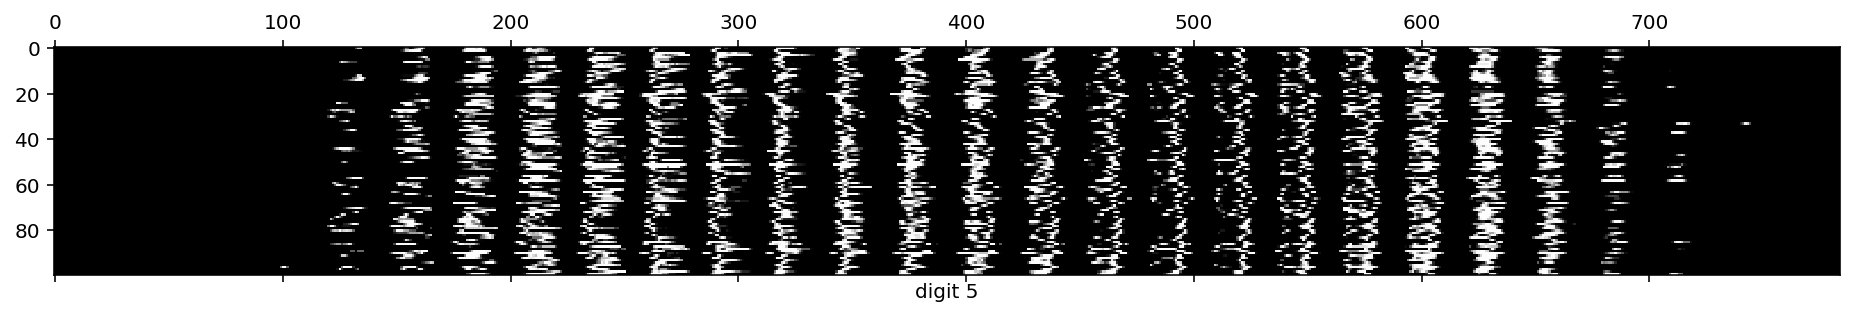

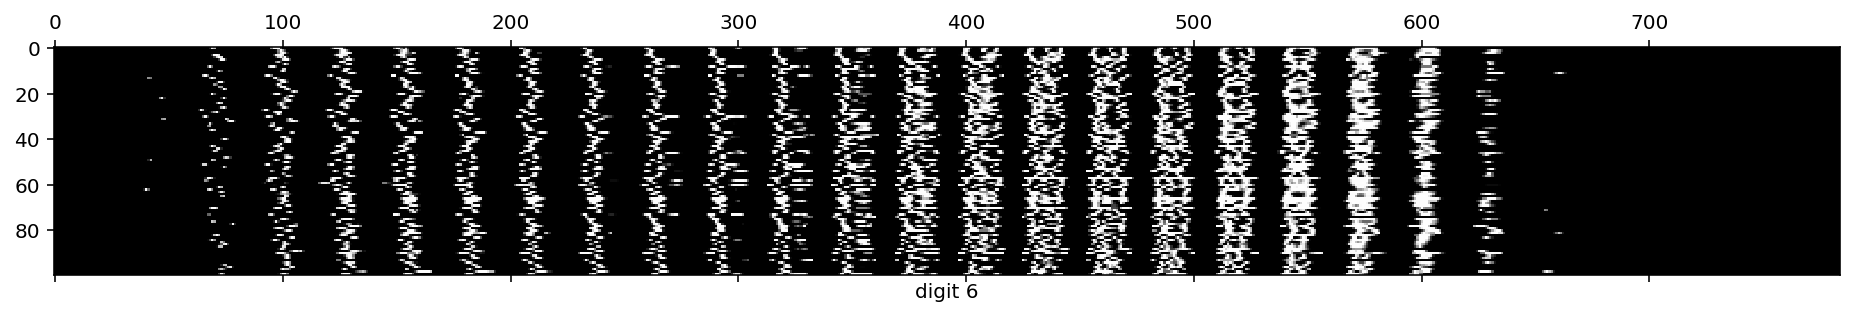

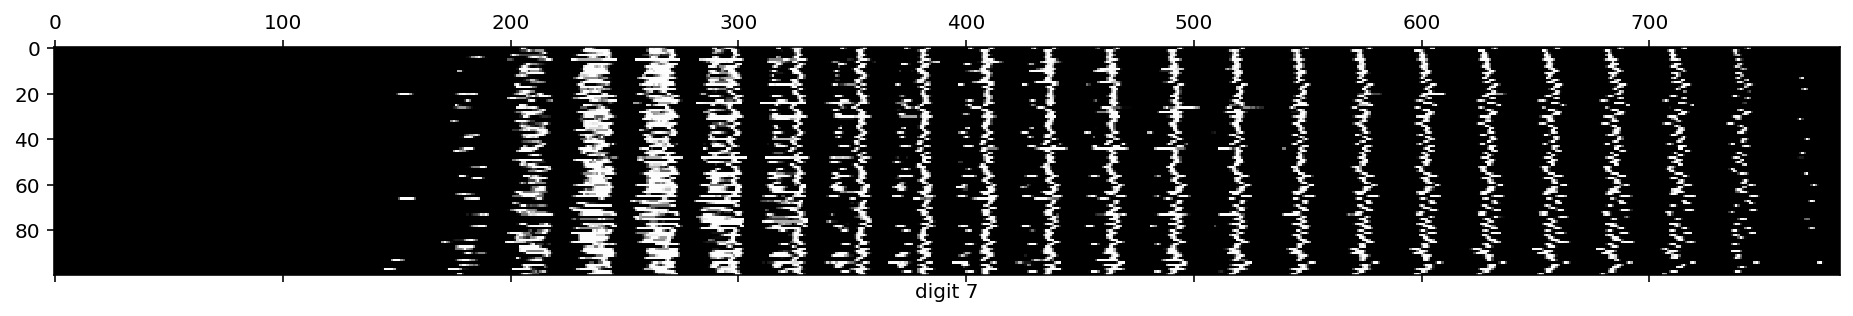

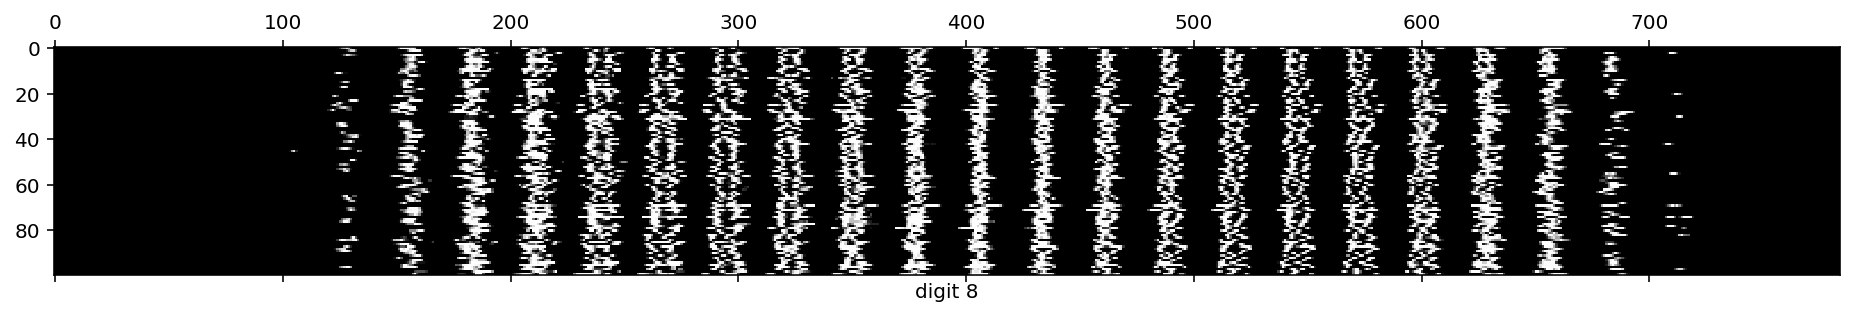

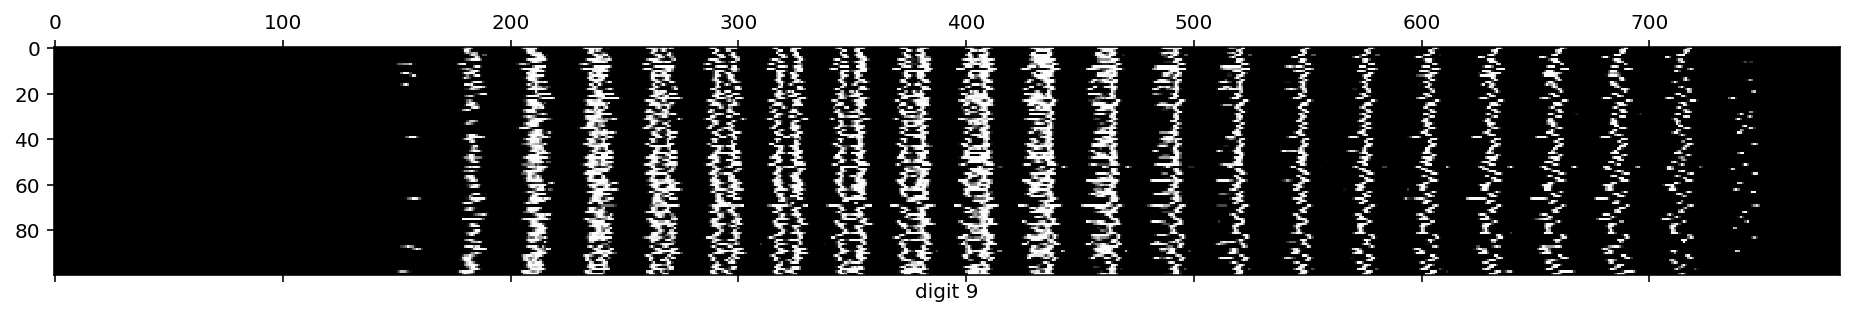

In [39]:
for digit in range(10):
    X=df[df.columns[df.columns.str.startswith('pixel')]][df['class']==digit].to_numpy()
#     print(X.shape)
    plt.matshow(X[:100], cmap='gray')
    plt.xlabel(f'digit {digit}') # บอกว่าเป็น เลข อะไร

---
## Classify handwritten digits using Logistic Regression, SVC, etc

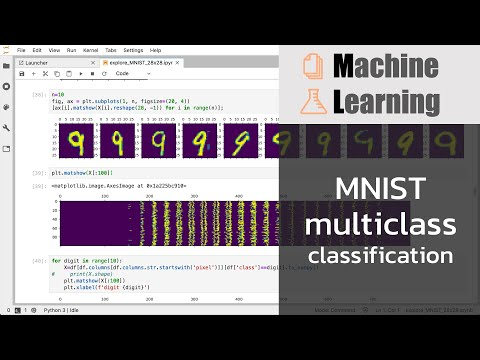

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('Z9gB9LHBlsM', width=720, height=405)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics

In [41]:
print(f'data_file: {data_file}')
df=pd.read_csv(data_file)
df.head()

data_file: https://github.com/prasertcbs/basic-dataset/raw/master/mnist_28x28_5000rows.csv.zip


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [42]:
D=df[df.columns[df.columns.str.startswith('pixel')]].to_numpy()
D.shape

(5000, 784)

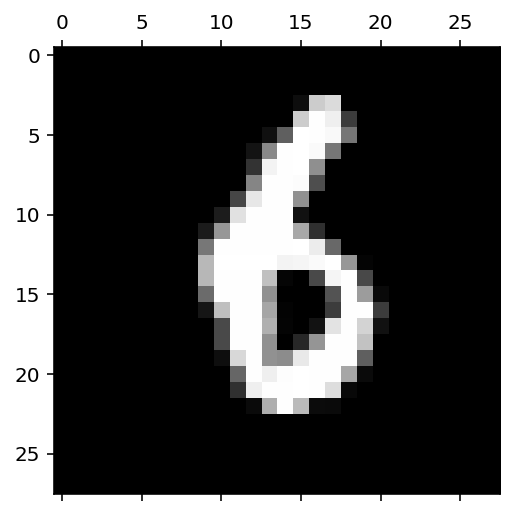

In [43]:
plt.matshow(D[100].reshape(28, -1), cmap='gray')

In [44]:
df['class'][:5] # target/label

0    3
1    3
2    1
3    1
4    3
Name: class, dtype: int64

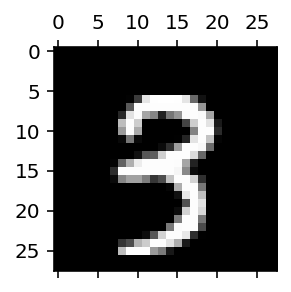

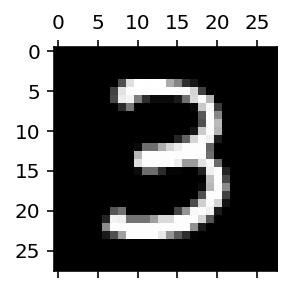

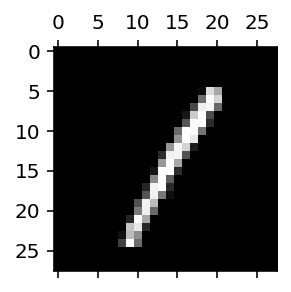

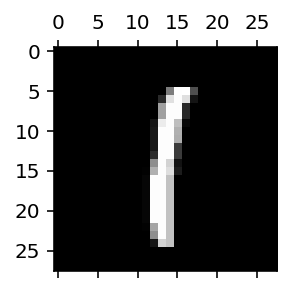

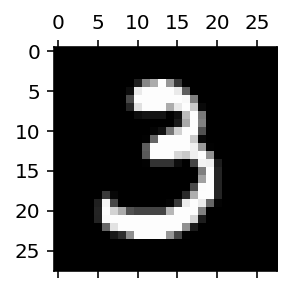

In [45]:
for i in range(5):
    matfig = plt.figure(figsize=(2,2))
    plt.matshow(D[i].reshape(28, -1), cmap='gray', fignum=matfig.number)

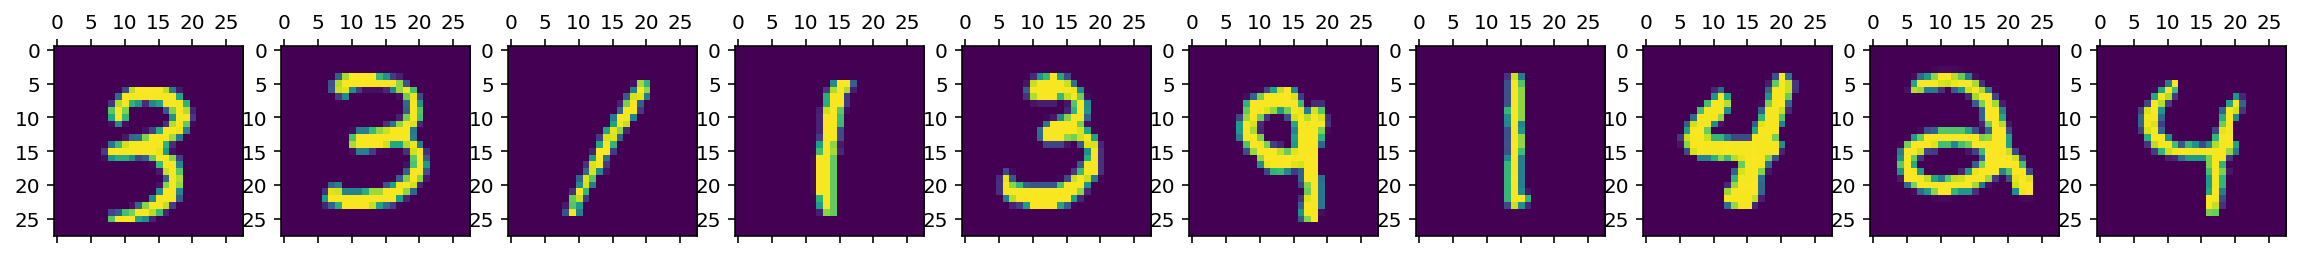

In [46]:
n=10
fig, ax = plt.subplots(1, n, figsize=(20, 4))
[ax[i].matshow(D[i].reshape(28, -1)) for i in range(n)];

## train test split

In [47]:
from sklearn.model_selection import train_test_split
X = df[df.columns[df.columns.str.startswith('pixel')]]
y = df['class']
test_size=.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=7, stratify=y)

In [48]:
X_train.shape

(4000, 784)

In [49]:
X_test.shape

(1000, 784)

In [50]:
X_train[:2]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
2938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Classifier

In [51]:
model=LogisticRegression()
# model=SVC()
model.fit(X_train, y_train)
print(f'train score={model.score(X_train, y_train):.4f}\ntest  score={model.score(X_test, y_test):.4f}')

train score=1.0000
test  score=0.8640


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### compare multiple models

In [52]:
models=[LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GaussianNB()]
for model in models:
    model.fit(X_train, y_train)
    print(f'{model.__class__}')
    print(f'train score={model.score(X_train, y_train):.4f}\ntest  score={model.score(X_test, y_test):.4f}')
    print('-' * 100)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<class 'sklearn.linear_model._logistic.LogisticRegression'>
train score=1.0000
test  score=0.8640
----------------------------------------------------------------------------------------------------
<class 'sklearn.svm._classes.SVC'>
train score=0.9855
test  score=0.9410
----------------------------------------------------------------------------------------------------
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
train score=1.0000
test  score=0.7470
----------------------------------------------------------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
train score=1.0000
test  score=0.9320
----------------------------------------------------------------------------------------------------
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
train score=0.6703
test  score=0.6510
----------------------------------------------------------------------------------------------------
<class 'sklearn.naive_bayes.Gaussi

In [53]:
predicted = model.predict(X_test)
predicted[:10]

array([7, 6, 1, 0, 7, 1, 8, 0, 9, 6], dtype=int64)

In [54]:
y_test[:10]

2969    7
1846    6
3506    1
2376    0
160     7
1773    1
4420    3
3281    2
174     4
2360    6
Name: class, dtype: int64

In [55]:
cm=metrics.confusion_matrix(y_test, predicted)
cm

array([[ 83,   0,   1,   0,   2,   0,   3,   0,   3,   0],
       [  0, 112,   0,   0,   0,   0,   4,   0,   3,   2],
       [ 17,   4,  19,  14,   2,   0,  23,   2,  22,   1],
       [  9,   7,   2,  19,   1,   0,   4,   0,  55,   7],
       [  8,   4,   2,   1,  10,   1,  11,   1,  25,  29],
       [ 12,   5,   0,   3,   2,   4,   5,   0,  56,   5],
       [  1,   1,   1,   0,   1,   1,  89,   0,   3,   0],
       [  1,   1,   2,   4,   0,   0,   1,  52,   5,  40],
       [  2,  11,   1,   1,   3,   3,   4,   0,  55,   6],
       [  0,   1,   1,   0,   3,   0,   0,   1,   5,  95]], dtype=int64)

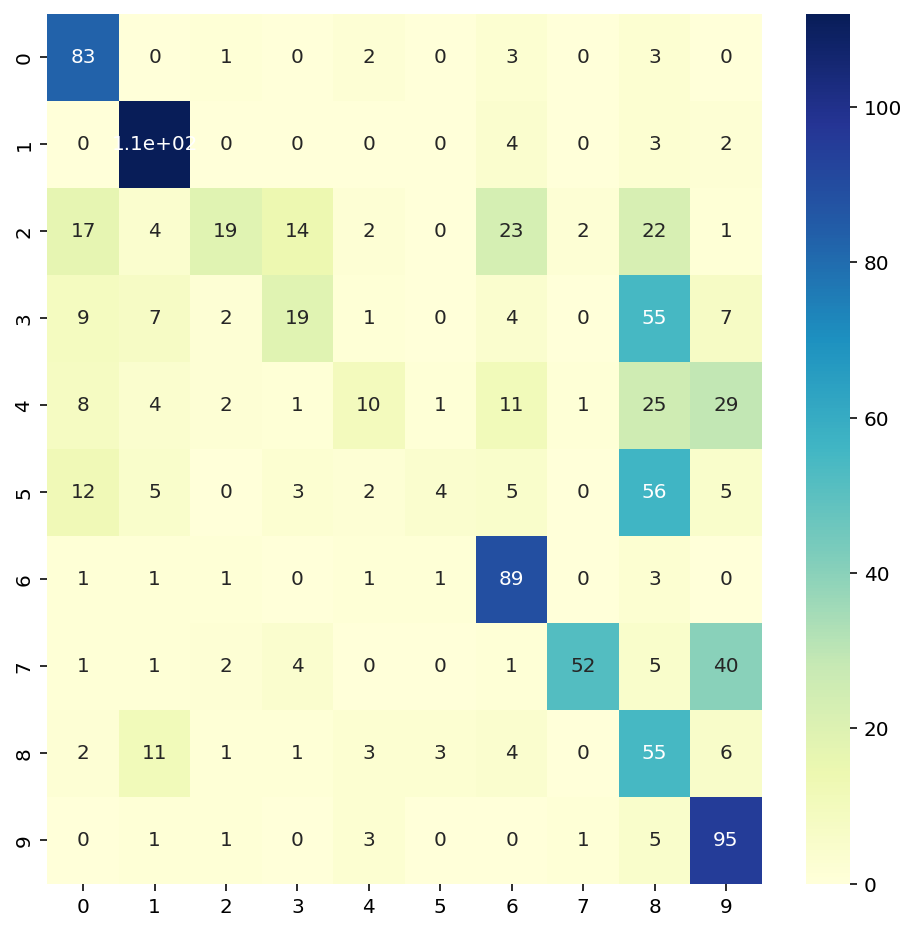

In [56]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap="YlGnBu");

In [57]:
cm=cm.astype('float')
cm[cm == 0] = np.nan
cm

array([[ 83.,  nan,   1.,  nan,   2.,  nan,   3.,  nan,   3.,  nan],
       [ nan, 112.,  nan,  nan,  nan,  nan,   4.,  nan,   3.,   2.],
       [ 17.,   4.,  19.,  14.,   2.,  nan,  23.,   2.,  22.,   1.],
       [  9.,   7.,   2.,  19.,   1.,  nan,   4.,  nan,  55.,   7.],
       [  8.,   4.,   2.,   1.,  10.,   1.,  11.,   1.,  25.,  29.],
       [ 12.,   5.,  nan,   3.,   2.,   4.,   5.,  nan,  56.,   5.],
       [  1.,   1.,   1.,  nan,   1.,   1.,  89.,  nan,   3.,  nan],
       [  1.,   1.,   2.,   4.,  nan,  nan,   1.,  52.,   5.,  40.],
       [  2.,  11.,   1.,   1.,   3.,   3.,   4.,  nan,  55.,   6.],
       [ nan,   1.,   1.,  nan,   3.,  nan,  nan,   1.,   5.,  95.]])

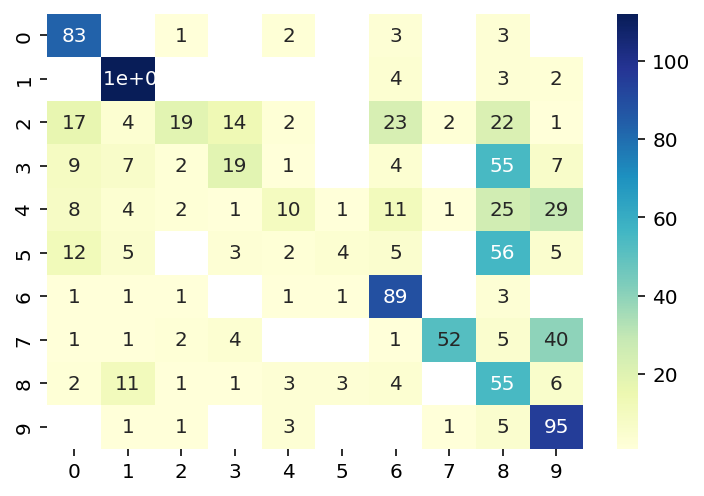

In [58]:
sns.heatmap(cm, annot=True, cmap="YlGnBu");

In [59]:
model.score(X_test, y_test)

0.538

In [60]:
metrics.accuracy_score(y_test, predicted)

0.538

In [61]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.62      0.90      0.74        92
           1       0.77      0.93      0.84       121
           2       0.66      0.18      0.29       104
           3       0.45      0.18      0.26       104
           4       0.42      0.11      0.17        92
           5       0.44      0.04      0.08        92
           6       0.62      0.92      0.74        97
           7       0.93      0.49      0.64       106
           8       0.24      0.64      0.35        86
           9       0.51      0.90      0.65       106

    accuracy                           0.54      1000
   macro avg       0.57      0.53      0.48      1000
weighted avg       0.58      0.54      0.49      1000



In [62]:
pd.crosstab(y_test, predicted, margins=True)

col_0,0,1,2,3,4,5,6,7,8,9,All
class,,,,,,,,,,,
0,83,0,1,0,2,0,3,0,3,0,92
1,0,112,0,0,0,0,4,0,3,2,121
2,17,4,19,14,2,0,23,2,22,1,104
3,9,7,2,19,1,0,4,0,55,7,104
4,8,4,2,1,10,1,11,1,25,29,92
5,12,5,0,3,2,4,5,0,56,5,92
6,1,1,1,0,1,1,89,0,3,0,97
7,1,1,2,4,0,0,1,52,5,40,106
8,2,11,1,1,3,3,4,0,55,6,86


## Principal Component Analysis (PCA)

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Fit on training set only.
scaler.fit(X_train) # Apply transform to both the training set and the test set.
X_train_t = scaler.transform(X_train)
X_test_t = scaler.transform(X_test)

In [64]:
X_train.shape

(4000, 784)

In [65]:
scaler.mean_[:50]

array([0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.02125, 0.08875, 0.12025, 0.07275, 0.0765 , 0.119  , 0.17925, 0.11225, 0.10525, 0.13225, 0.17175, 0.1185 , 0.08525, 0.059  , 0.01125, 0.     ])

In [66]:
np.sqrt(scaler.var_[:50])

array([0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 1.3438    , 4.31223532, 5.38486675, 4.02435802, 3.77082852, 4.32693182, 6.52208705, 3.69691086, 4.48688895, 5.17452992, 5.68091119, 4.99929573, 3.35022125, 3.73102117, 0.71142353, 0.        ])

## standardized data

In [67]:
from sklearn.decomposition import PCA 

# If 0 < n_components < 1 and svd_solver == 'full', 
# select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.
pca = PCA(.9) # จะใช้กี่ component ก็ได้เเต่ขอให้อธิบายผลได้ 90%
# pca = PCA(n_components=100)

pca.fit(X_train_t)

PCA(n_components=0.9)

In [68]:
pca.n_components_

176

In [69]:
X_train_pca = pca.transform(X_train_t) # Apply dimensionality reduction to X_train_t
X_test_pca = pca.transform(X_test_t) # Apply dimensionality reduction to X_test_t

In [70]:
X_train_pca.shape

(4000, 176)

In [71]:
X_test_pca.shape

(1000, 176)

In [72]:
pca.components_

array([[ 1.17865972e-19,  4.85722573e-17, -1.66533454e-16, ..., -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 4.90552859e-19,  5.55111512e-17,  0.00000000e+00, ...,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.76472912e-18, -1.66533454e-16,  0.00000000e+00, ...,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-3.48870472e-18, -1.00613962e-16, -1.11022302e-16, ...,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.66198622e-18, -1.38777878e-17,  2.08166817e-17, ...,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.23484898e-18, -1.73472348e-17,  5.55111512e-17, ..., -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [73]:
pca.components_.shape

(176, 784)

In [74]:
X_train[:2]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
2938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
pd.DataFrame(X_train_pca[:2])

,0,1,2,3,4,5,6,7,8,9,...,166,167,168,169,170,171,172,173,174,175
0,0.801595,2.325161,-7.610040,3.742826,-0.963635,1.383925,-4.118464,-0.563857,-3.314827,1.996987,...,-1.136393,-0.007915,0.407140,-0.469816,-0.620968,-0.607156,-0.527236,-0.357161,0.771501,-0.218865
1,0.702166,3.781217,5.842429,-9.296586,-3.454530,-3.934976,-1.725805,2.969331,3.494764,1.756731,...,0.751094,-0.173173,0.698981,0.530557,-0.001224,-0.323311,0.807348,-0.097511,0.163573,-0.179610


In [76]:
dpc=pd.DataFrame(pca.components_.T, 
                 index=X_train.columns, 
                 columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4) #Eigenvectors
dpc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176
pixel1,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0
pixel2,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,...,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0
pixel3,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
pixel4,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,...,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
pixel5,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,...,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel780,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0
pixel781,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0
pixel782,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0
pixel783,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0


In [77]:
np.dot(X_train_t, pca.components_.T) # equals pca.transform

array([[ 0.80159494,  2.32516081, -7.61004025, ..., -0.35716091,  0.77150055, -0.21886457],
       [ 0.70216604,  3.78121712,  5.8424291 , ..., -0.09751104,  0.16357307, -0.17961013],
       [-7.50629718,  0.27730219,  1.28946552, ..., -0.51738354, -0.3876708 ,  0.31874031],
       ...,
       [-2.30235166, -1.28428083, -6.23036095, ...,  0.40549861,  0.64784366,  0.88646383],
       [ 7.41678832, -3.41746603, -1.20808982, ...,  0.29057883,  1.22357615,  1.35807811],
       [13.8545928 ,  4.30713549, -0.29230131, ...,  0.03514303,  0.1685364 ,  2.56588887]])

In [78]:
pca.transform(X_train_t)

array([[ 0.80159494,  2.32516081, -7.61004025, ..., -0.35716091,  0.77150055, -0.21886457],
       [ 0.70216604,  3.78121712,  5.8424291 , ..., -0.09751104,  0.16357307, -0.17961013],
       [-7.50629718,  0.27730219,  1.28946552, ..., -0.51738354, -0.3876708 ,  0.31874031],
       ...,
       [-2.30235166, -1.28428083, -6.23036095, ...,  0.40549861,  0.64784366,  0.88646383],
       [ 7.41678832, -3.41746603, -1.20808982, ...,  0.29057883,  1.22357615,  1.35807811],
       [13.8545928 ,  4.30713549, -0.29230131, ...,  0.03514303,  0.1685364 ,  2.56588887]])

In [79]:
pca.transform(X_train_t).shape

(4000, 176)

In [80]:
XT=X_train.to_numpy()

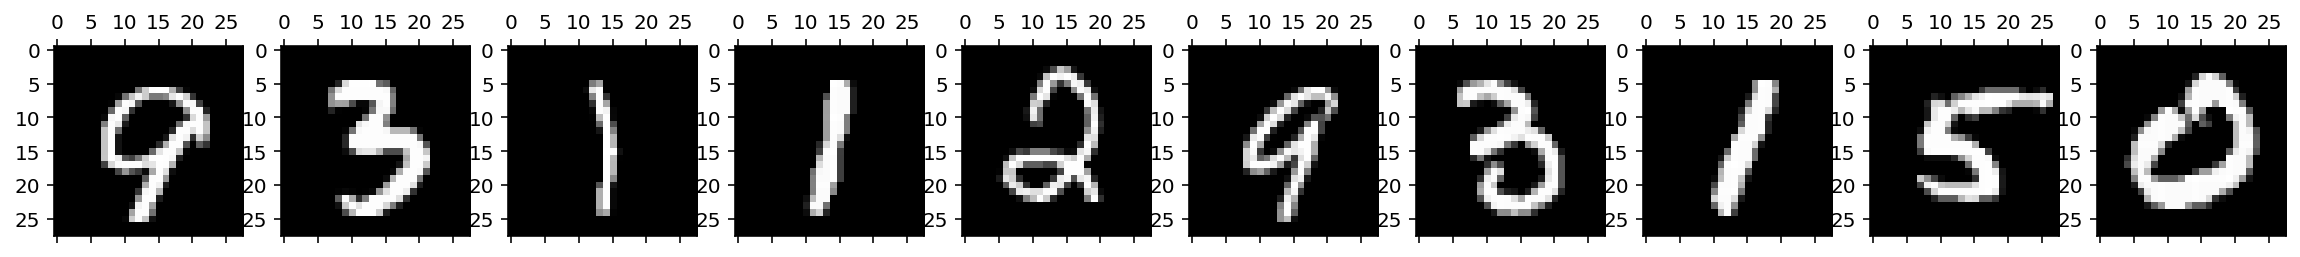

In [81]:
n_img=10
fig, ax = plt.subplots(1, n_img, figsize=(20, 4))
[ax[i].matshow(XT[i].reshape(28, -1), cmap='gray') for i in range(n_img)];

In [82]:
XP=np.dot(X_train_pca, pca.components_).round(4)
XP

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ...,  0.,  0.,  0.],
       [ 0., -0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0.,  0., -0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ...,  0.,  0.,  0.]])

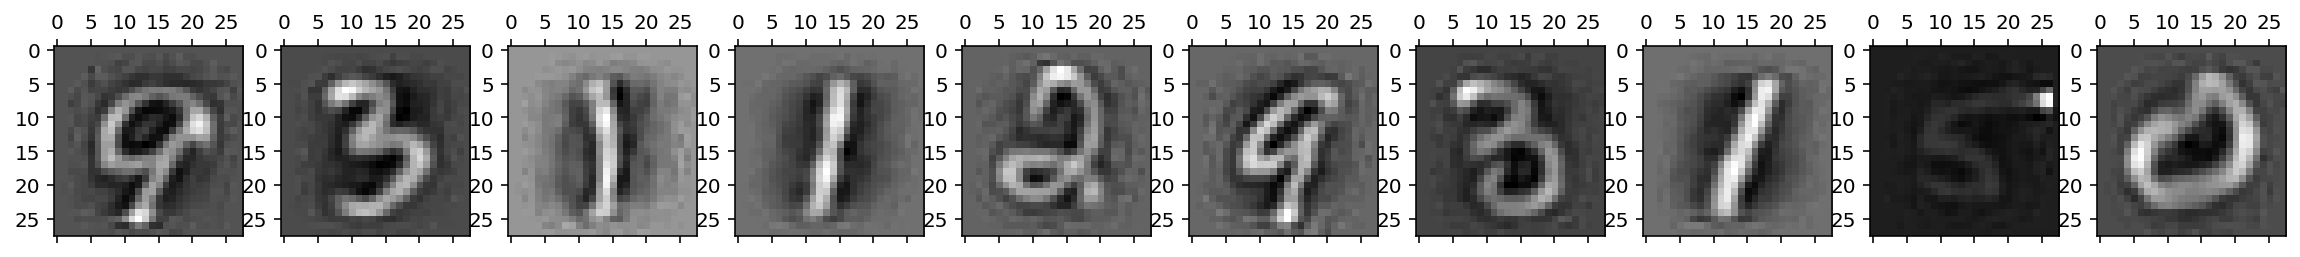

In [83]:
n_img=10
fig, ax = plt.subplots(1, n_img, figsize=(20, 4))
[ax[i].matshow(XP[i].reshape(28, -1), cmap='gray') for i in range(n_img)];

### compare different components

In [84]:
def plot_varying_components(dfX, n_img=10, n_components=[10, 20, 30, 50, 100, 200, 300], img_shape=(28, 28)):
    '''
    แสดง image ที่สร้างจาก pca ที่ n_components ต่าง ๆ กัน
    '''
    img_height = img_shape[0]
    img_width = img_shape[1]
    
    X_train=dfX
    scaler = StandardScaler() # Fit on training set only.
    scaler.fit(X_train) # Apply transform

    XT=X_train.to_numpy() # original X_train
    
    fig, ax = plt.subplots(1, n_img, figsize=(20, 4))
    [ax[i].matshow(XT[i].reshape(img_height, img_width)) for i in range(n_img)];

    for n_component in n_components:
        X_train_t = scaler.transform(X_train)
        # If 0 < n_components < 1 and svd_solver == 'full', 
        # select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.
        pca = PCA(n_components=n_component)
        X_train_pca = pca.fit_transform(X_train_t)  # Apply dimensionality reduction to X_train_t
        print(f'n_component = {n_component}, {X_train_pca.shape}')
        XP=np.dot(X_train_pca, pca.components_) # matrix A x B
        fig, ax = plt.subplots(1, n_img, figsize=(20, 4))
        [ax[i].matshow(XP[i].reshape(img_height, img_width)) for i in range(n_img)]


n_component = 5, (4000, 5)
n_component = 10, (4000, 10)
n_component = 50, (4000, 50)
n_component = 100, (4000, 100)
n_component = 300, (4000, 300)
n_component = 500, (4000, 500)


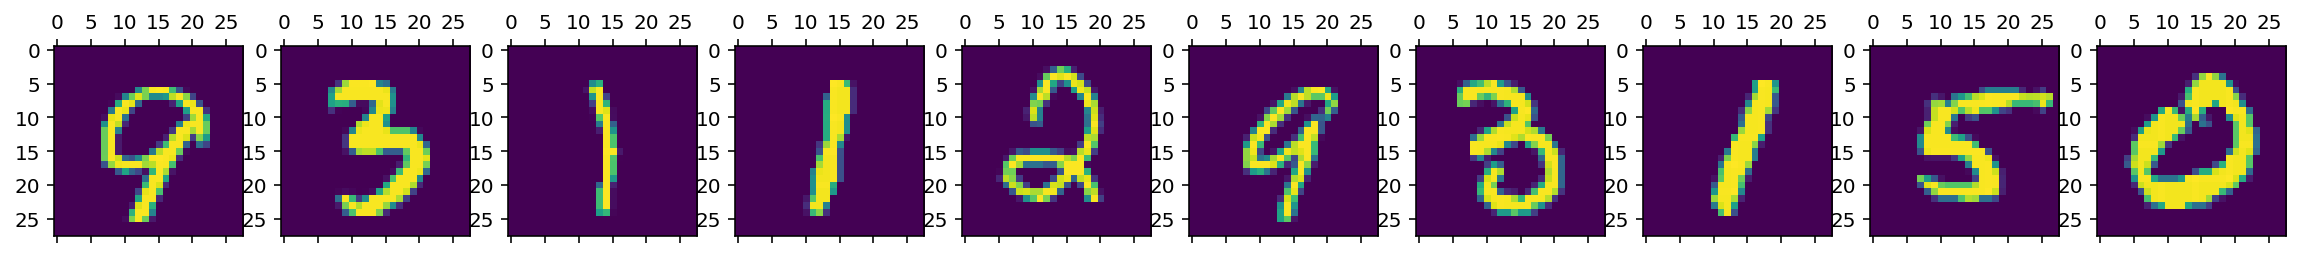

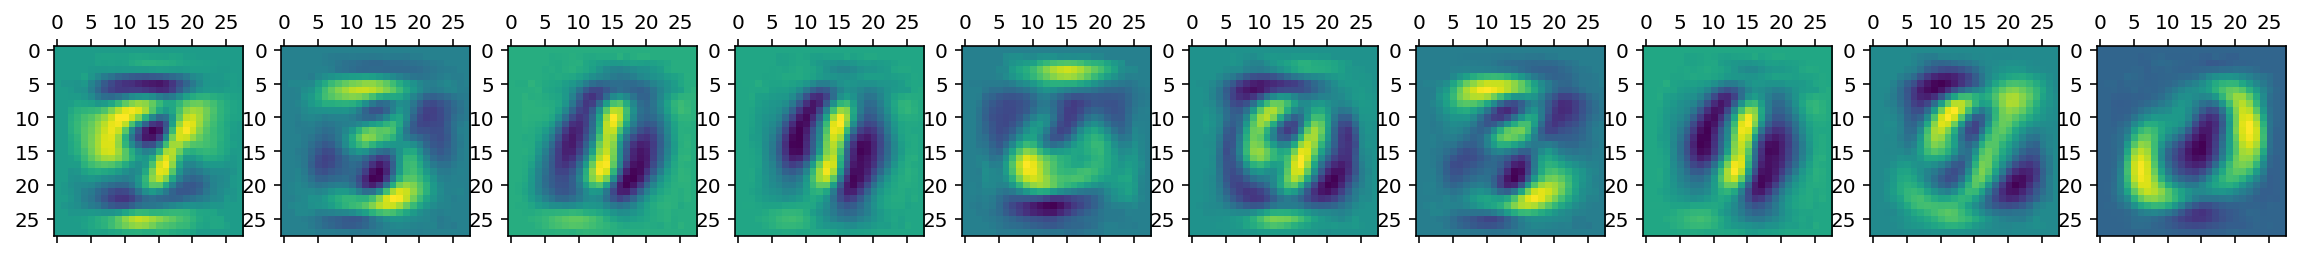

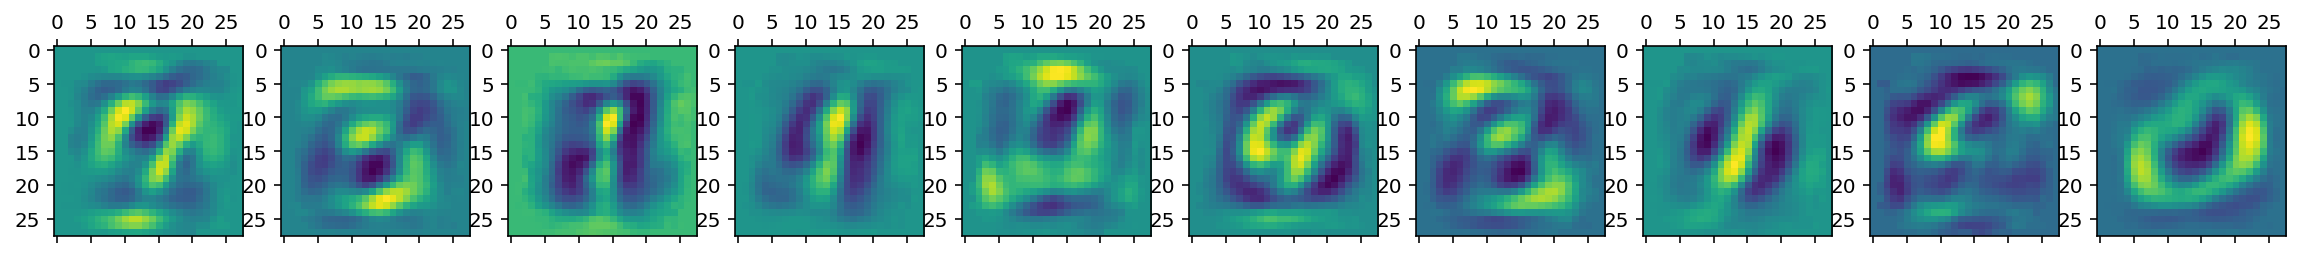

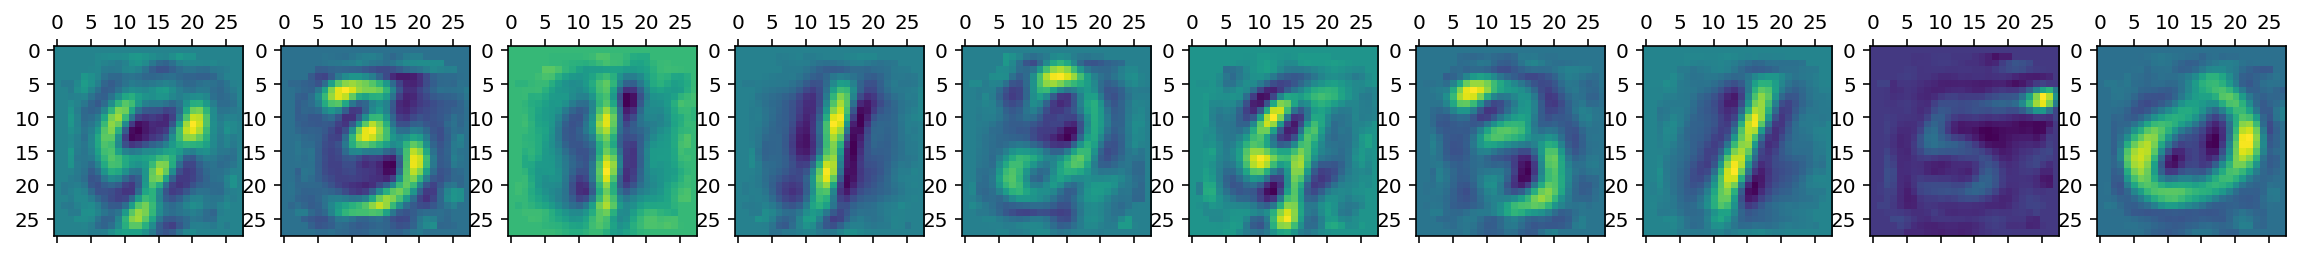

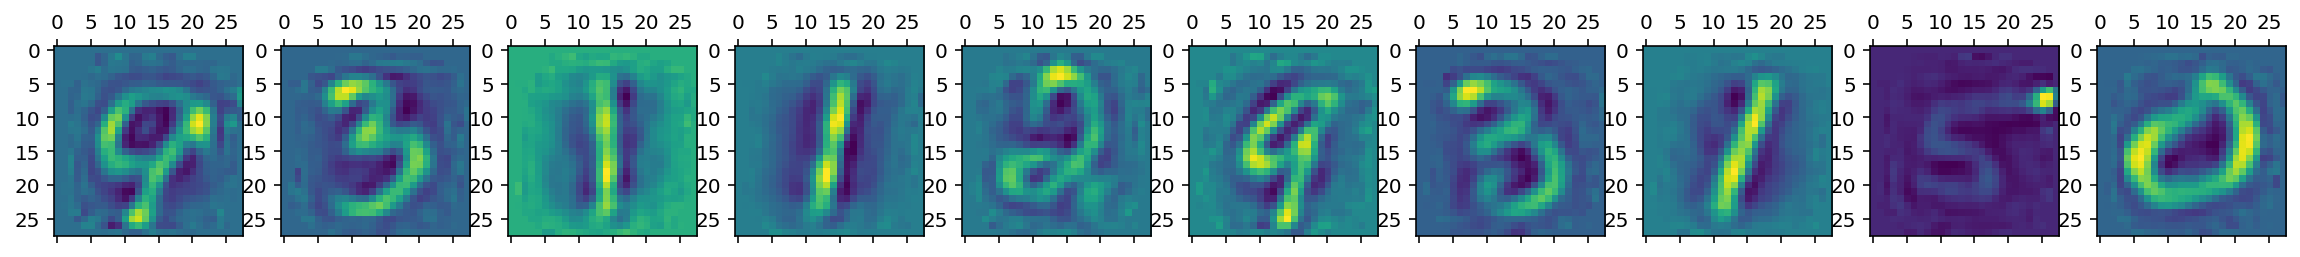

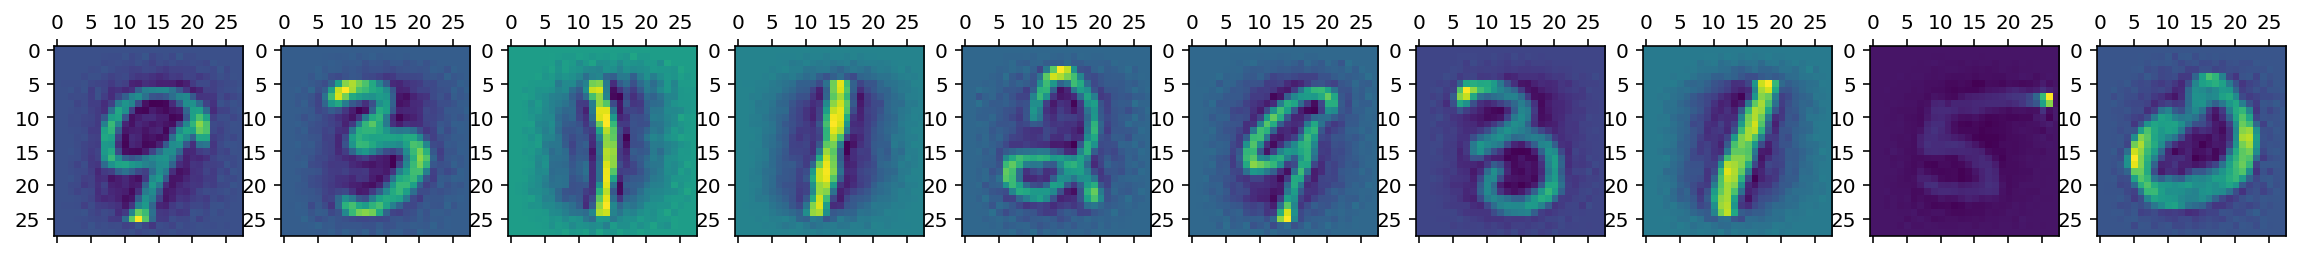

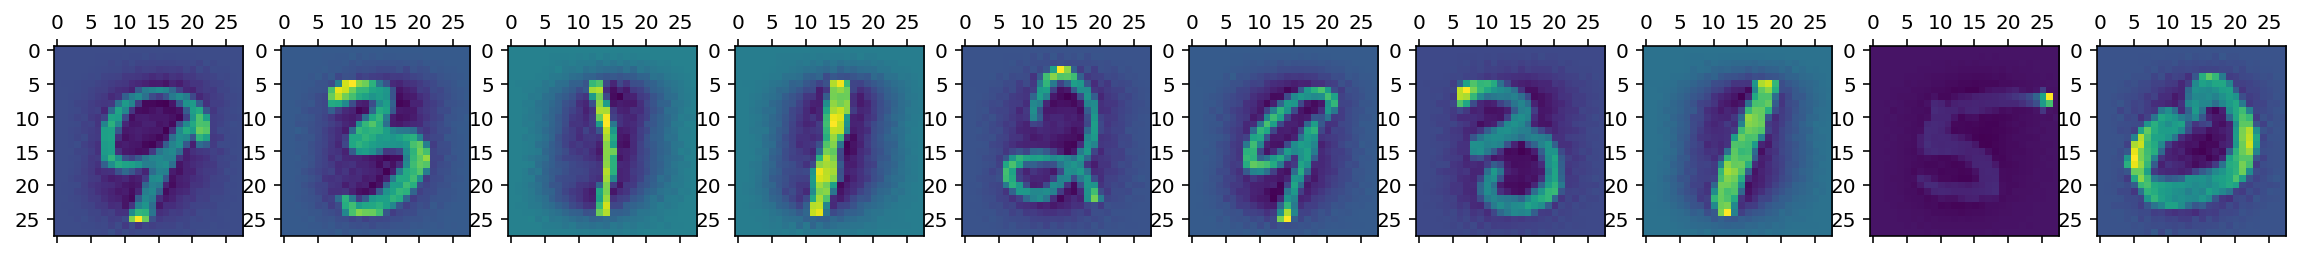

In [85]:
plot_varying_components(X_train, 10, [5, 10, 50, 100, 300, 500], (28, 28))
# plot_varying_compoents(X_train, [10, 50, 100, 200, 300])

## logistic regression

In [86]:
model = LogisticRegression(multi_class="auto")
model.fit(X_train_pca, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [87]:
model.score(X_train_pca, y_train)

0.98525

In [88]:
model.score(X_test_pca, y_test)

0.883

In [89]:
X_test_pca[:1]

array([[-3.92927455,  7.66154283, -7.21922601,  0.11224431, -0.40850228, -3.05827365,  2.31312652,  5.08895675, -4.22890975, -1.28045609, -4.42223043,  3.40547043, -4.12207615, -1.82834818,  1.83884099, -2.97557346,  0.16592628, -3.47977222,  0.89967251, -2.38882519, -2.36698897, -4.14660253,  0.30421388, -3.83892743, -0.35759697,  0.72713073, -0.4306283 ,  4.66191985, -0.44849124, -0.0592693 , -2.92098884,  2.50381738, -1.30809568,  2.40199087, -3.50247308,  0.78243091,  1.88240139,  0.82872738,  5.59538476, -1.99248893, -0.01446444, -2.29007584,  1.58378783, -0.72259312, -1.77573715,  1.74140112, -0.5116036 , -0.98245659,  4.26755285,  2.59126808, -2.69377254,  3.91329562, -2.52151267,  0.98993057, -1.11950971, -0.44785172, -1.3919862 ,  2.91161802, -1.07781422, -4.52691541,  0.11071855,  0.65076496,  3.77250168, -0.13790663, -0.19463291, -1.00951075, -4.57713566, -3.87096508, -1.24478758, -3.26625342, -1.19395926,  2.04284892, -1.46629128,  1.22639112,  1.74633983,  2.28455848,
    

In [90]:
predicted = model.predict(X_test_pca)
predicted

array([7, 6, 1, 0, 7, 1, 3, 2, 4, 6, 4, 4, 9, 6, 4, 0, 9, 8, 8, 0, 7, 2, 2, 4, 9, 0, 7, 8, 0, 1, 3, 1, 9, 7, 9, 3, 8, 5, 5, 3, 8, 7, 4, 2, 8, 6, 1, 0, 3, 2, 3, 1, 2, 4, 0, 2, 2, 2, 8, 2, 3, 7, 4, 2, 3, 9, 2, 4, 3, 1, 0, 0, 3, 2, 9, 4, 1, 8, 3, 1, 2, 1, 2, 6, 6, 3, 4, 3, 9, 7, 3, 9, 0, 2, 8, 2, 7, 1, 0, 1, 1, 8, 0, 8, 0, 0, 5, 8, 5, 0, 5, 6, 5, 7, 2, 6, 2, 3, 4, 7, 4, 9, 3, 5, 6, 4, 3, 6, 8, 9, 4, 6, 6, 7, 2, 6, 1, 0, 6, 7, 2, 9, 0, 6, 8, 6, 5, 7, 4, 4, 7, 1, 4, 1, 4, 3, 7, 1, 7, 1, 6, 2, 1, 2, 7, 4, 1, 1, 9, 7, 8, 7, 8, 1, 5, 9, 1, 2, 2, 7, 6, 8, 9, 4, 2, 2, 4, 2, 7, 5, 0, 1, 3, 6, 6, 6, 5, 4, 4, 6, 1, 1, 6, 7, 5, 7, 9, 1, 7, 4, 1, 5, 0, 9, 1, 6, 4, 9, 6, 3, 0, 5, 4, 0, 9, 6, 6, 6, 3, 0, 9, 0, 3, 3, 1, 1, 3, 7, 6, 5, 7, 3, 1, 5, 1, 0, 4, 8, 0, 2, 8, 6, 6, 2, 7, 4, 2, 6, 3, 4, 7, 0, 2, 6, 3, 1, 4, 8, 4, 0, 8, 0, 2, 6, 5, 4, 2, 5, 1, 9, 2, 5, 8, 5, 1, 7, 8, 0, 4, 1, 1, 1, 1, 0, 9, 1, 2, 1, 5, 0, 7, 7, 4, 0, 4, 1, 2, 5, 1, 8, 8, 3, 9, 2, 6, 6, 4, 8, 7, 7, 1, 8, 9, 1, 1, 9, 1, 2, 2, 5, 6,


In [91]:
y_test[:10] # ถ้า predicted = y_test ก็เเสดงว่าเครื่องทายถูก

2969    7
1846    6
3506    1
2376    0
160     7
1773    1
4420    3
3281    2
174     4
2360    6
Name: class, dtype: int64

In [92]:
cm=metrics.confusion_matrix(y_test, predicted)
cm

array([[ 87,   0,   0,   0,   0,   3,   2,   0,   0,   0],
       [  0, 120,   0,   0,   0,   0,   1,   0,   0,   0],
       [  4,   1,  92,   2,   0,   0,   2,   2,   0,   1],
       [  1,   1,   3,  88,   1,   5,   1,   1,   2,   1],
       [  2,   2,   0,   0,  83,   0,   2,   1,   0,   2],
       [  3,   1,   2,   6,   1,  74,   1,   0,   2,   2],
       [  3,   0,   6,   0,   2,   2,  81,   1,   2,   0],
       [  1,   0,   5,   2,   4,   0,   0,  91,   1,   2],
       [  0,   2,   4,   3,   1,   3,   0,   2,  71,   0],
       [  1,   0,   2,   2,   3,   0,   0,   2,   0,  96]], dtype=int64)

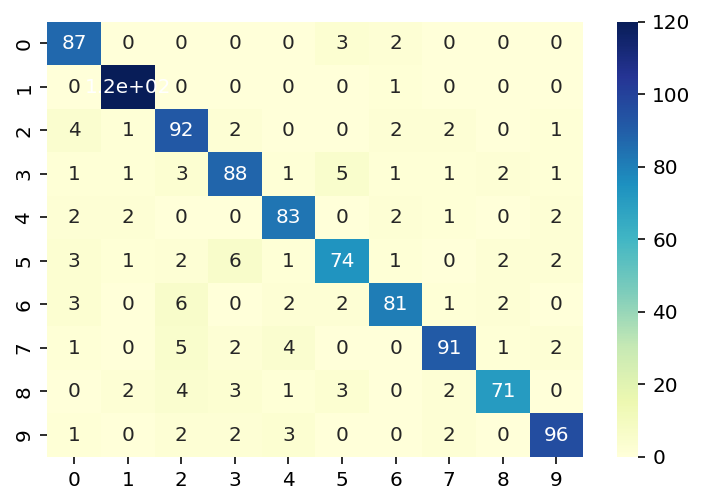

In [93]:
sns.heatmap(cm, annot=True, cmap="YlGnBu");

In [94]:
# เพื่อที่จะให้ช่องที่เป็น 0 ไม่เเสดงใน heat map
cm=cm.astype('float')
cm[cm == 0] = np.nan
cm

array([[ 87.,  nan,  nan,  nan,  nan,   3.,   2.,  nan,  nan,  nan],
       [ nan, 120.,  nan,  nan,  nan,  nan,   1.,  nan,  nan,  nan],
       [  4.,   1.,  92.,   2.,  nan,  nan,   2.,   2.,  nan,   1.],
       [  1.,   1.,   3.,  88.,   1.,   5.,   1.,   1.,   2.,   1.],
       [  2.,   2.,  nan,  nan,  83.,  nan,   2.,   1.,  nan,   2.],
       [  3.,   1.,   2.,   6.,   1.,  74.,   1.,  nan,   2.,   2.],
       [  3.,  nan,   6.,  nan,   2.,   2.,  81.,   1.,   2.,  nan],
       [  1.,  nan,   5.,   2.,   4.,  nan,  nan,  91.,   1.,   2.],
       [ nan,   2.,   4.,   3.,   1.,   3.,  nan,   2.,  71.,  nan],
       [  1.,  nan,   2.,   2.,   3.,  nan,  nan,   2.,  nan,  96.]])

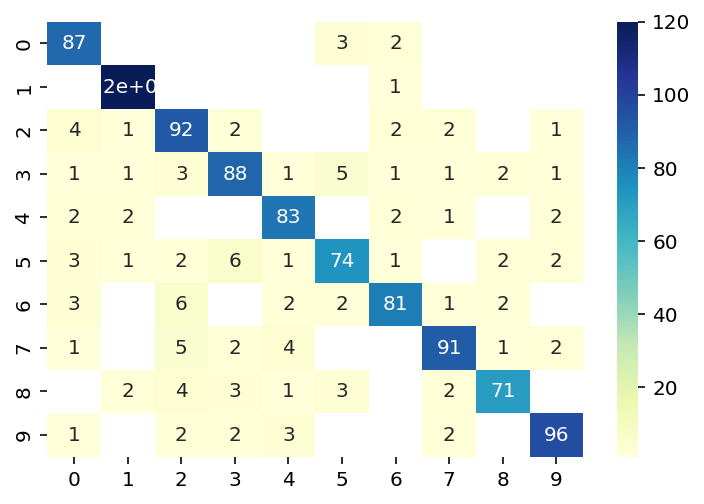

In [95]:
sns.heatmap(cm, annot=True, cmap="YlGnBu");

In [96]:
model.score(X_test_pca, y_test)

0.883

In [97]:
metrics.accuracy_score(y_test, predicted)

0.883

In [98]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        92
           1       0.94      0.99      0.97       121
           2       0.81      0.88      0.84       104
           3       0.85      0.85      0.85       104
           4       0.87      0.90      0.89        92
           5       0.85      0.80      0.83        92
           6       0.90      0.84      0.87        97
           7       0.91      0.86      0.88       106
           8       0.91      0.83      0.87        86
           9       0.92      0.91      0.91       106

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



### ดุว่ามีตัวไหนทายผิดบ้าง

In [99]:
y_test

2969    7
1846    6
3506    1
2376    0
160     7
       ..
3318    9
1031    2
4154    4
1531    2
2198    0
Name: class, Length: 1000, dtype: int64

In [100]:
y_test.reset_index(drop=True)

0      7
1      6
2      1
3      0
4      7
      ..
995    9
996    2
997    4
998    2
999    0
Name: class, Length: 1000, dtype: int64

In [101]:
predicted

array([7, 6, 1, 0, 7, 1, 3, 2, 4, 6, 4, 4, 9, 6, 4, 0, 9, 8, 8, 0, 7, 2, 2, 4, 9, 0, 7, 8, 0, 1, 3, 1, 9, 7, 9, 3, 8, 5, 5, 3, 8, 7, 4, 2, 8, 6, 1, 0, 3, 2, 3, 1, 2, 4, 0, 2, 2, 2, 8, 2, 3, 7, 4, 2, 3, 9, 2, 4, 3, 1, 0, 0, 3, 2, 9, 4, 1, 8, 3, 1, 2, 1, 2, 6, 6, 3, 4, 3, 9, 7, 3, 9, 0, 2, 8, 2, 7, 1, 0, 1, 1, 8, 0, 8, 0, 0, 5, 8, 5, 0, 5, 6, 5, 7, 2, 6, 2, 3, 4, 7, 4, 9, 3, 5, 6, 4, 3, 6, 8, 9, 4, 6, 6, 7, 2, 6, 1, 0, 6, 7, 2, 9, 0, 6, 8, 6, 5, 7, 4, 4, 7, 1, 4, 1, 4, 3, 7, 1, 7, 1, 6, 2, 1, 2, 7, 4, 1, 1, 9, 7, 8, 7, 8, 1, 5, 9, 1, 2, 2, 7, 6, 8, 9, 4, 2, 2, 4, 2, 7, 5, 0, 1, 3, 6, 6, 6, 5, 4, 4, 6, 1, 1, 6, 7, 5, 7, 9, 1, 7, 4, 1, 5, 0, 9, 1, 6, 4, 9, 6, 3, 0, 5, 4, 0, 9, 6, 6, 6, 3, 0, 9, 0, 3, 3, 1, 1, 3, 7, 6, 5, 7, 3, 1, 5, 1, 0, 4, 8, 0, 2, 8, 6, 6, 2, 7, 4, 2, 6, 3, 4, 7, 0, 2, 6, 3, 1, 4, 8, 4, 0, 8, 0, 2, 6, 5, 4, 2, 5, 1, 9, 2, 5, 8, 5, 1, 7, 8, 0, 4, 1, 1, 1, 1, 0, 9, 1, 2, 1, 5, 0, 7, 7, 4, 0, 4, 1, 2, 5, 1, 8, 8, 3, 9, 2, 6, 6, 4, 8, 7, 7, 1, 8, 9, 1, 1, 9, 1, 2, 2, 5, 6,


In [102]:
dx=pd.DataFrame({'target': y_test.reset_index(drop=True), 'pred': predicted})
dx.head(20)

,target,pred
0,7,7
1,6,6
2,1,1
3,0,0
4,7,7
5,1,1
6,3,3
7,2,2
8,4,4
9,6,6


In [103]:
dx[dx.target != dx.pred].head()

,target,pred
14,3,4
18,5,8
21,8,2
43,6,2
47,2,0


In [104]:
X_test[:5]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
2969,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1846,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
dg=pd.concat([X_test.reset_index(drop=True), dx], axis=1)
dg[:5]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target,pred
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,6
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,7


In [106]:
len(dg)

1000

In [107]:
dg.shape

(1000, 786)

## misclassified cases

In [108]:
dq=dg[dg.target != dg.pred]
dq[:5]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target,pred
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,4
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,8
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,2
43,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,2
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


In [109]:
len(dq) # เเสดงว่า model นี้ ทายผิดไป 117 ตัว

117

In [110]:
cm=metrics.confusion_matrix(dq.target, dq.pred)
cm

array([[0, 0, 0, 0, 0, 3, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [4, 1, 0, 2, 0, 0, 2, 2, 0, 1],
       [1, 1, 3, 0, 1, 5, 1, 1, 2, 1],
       [2, 2, 0, 0, 0, 0, 2, 1, 0, 2],
       [3, 1, 2, 6, 1, 0, 1, 0, 2, 2],
       [3, 0, 6, 0, 2, 2, 0, 1, 2, 0],
       [1, 0, 5, 2, 4, 0, 0, 0, 1, 2],
       [0, 2, 4, 3, 1, 3, 0, 2, 0, 0],
       [1, 0, 2, 2, 3, 0, 0, 2, 0, 0]], dtype=int64)

In [111]:
incorrect = np.sum(cm) - np.trace(cm) # sum off diagonal
incorrect

117

In [112]:
D=dq.drop(columns=['target', 'pred']).to_numpy()
D[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [113]:
D.shape

(117, 784)

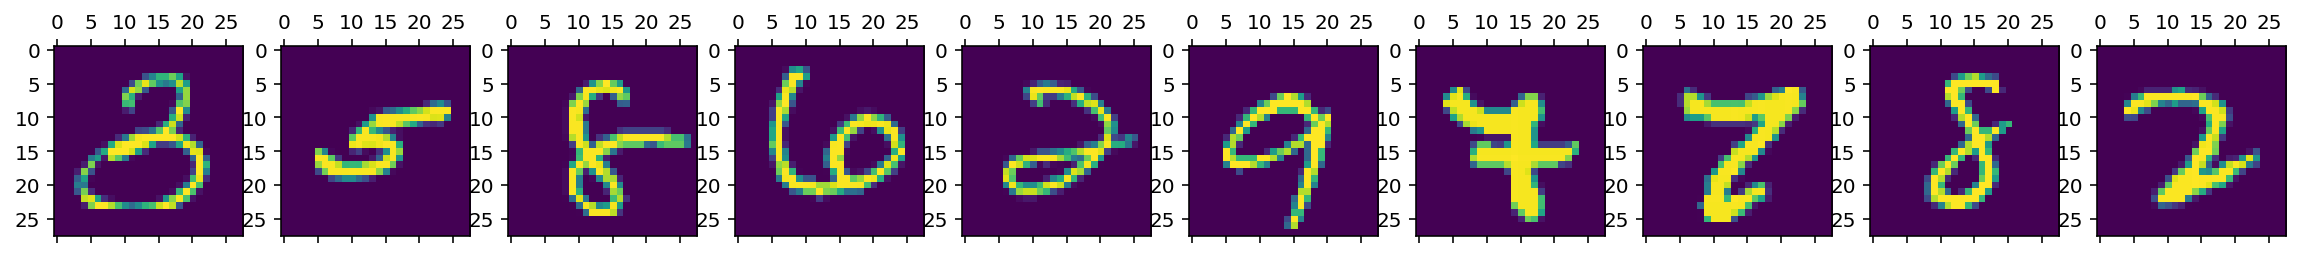

In [114]:
n=10
fig, ax = plt.subplots(1, n, figsize=(20, 4))
[ax[i].matshow(D[i].reshape(28, -1)) for i in range(n)];

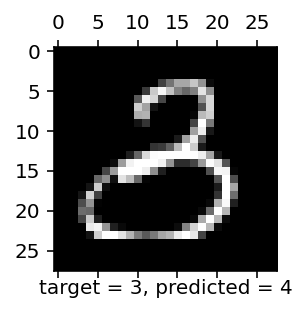

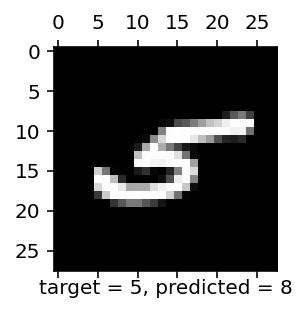

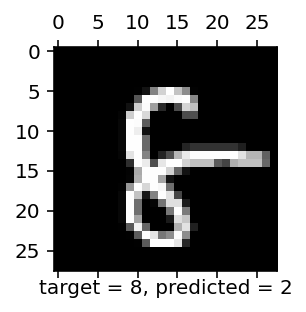

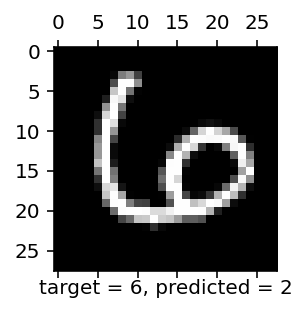

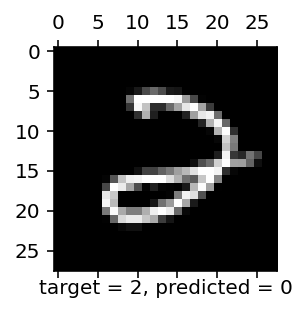

In [115]:
for i in range(5):
    matfig = plt.figure(figsize=(2,2))
    plt.matshow(D[i].reshape(28, -1), cmap='gray', fignum=matfig.number)
    plt.xlabel(f'target = {dq.target.iloc[i]}, predicted = {dq.pred.iloc[i]}')

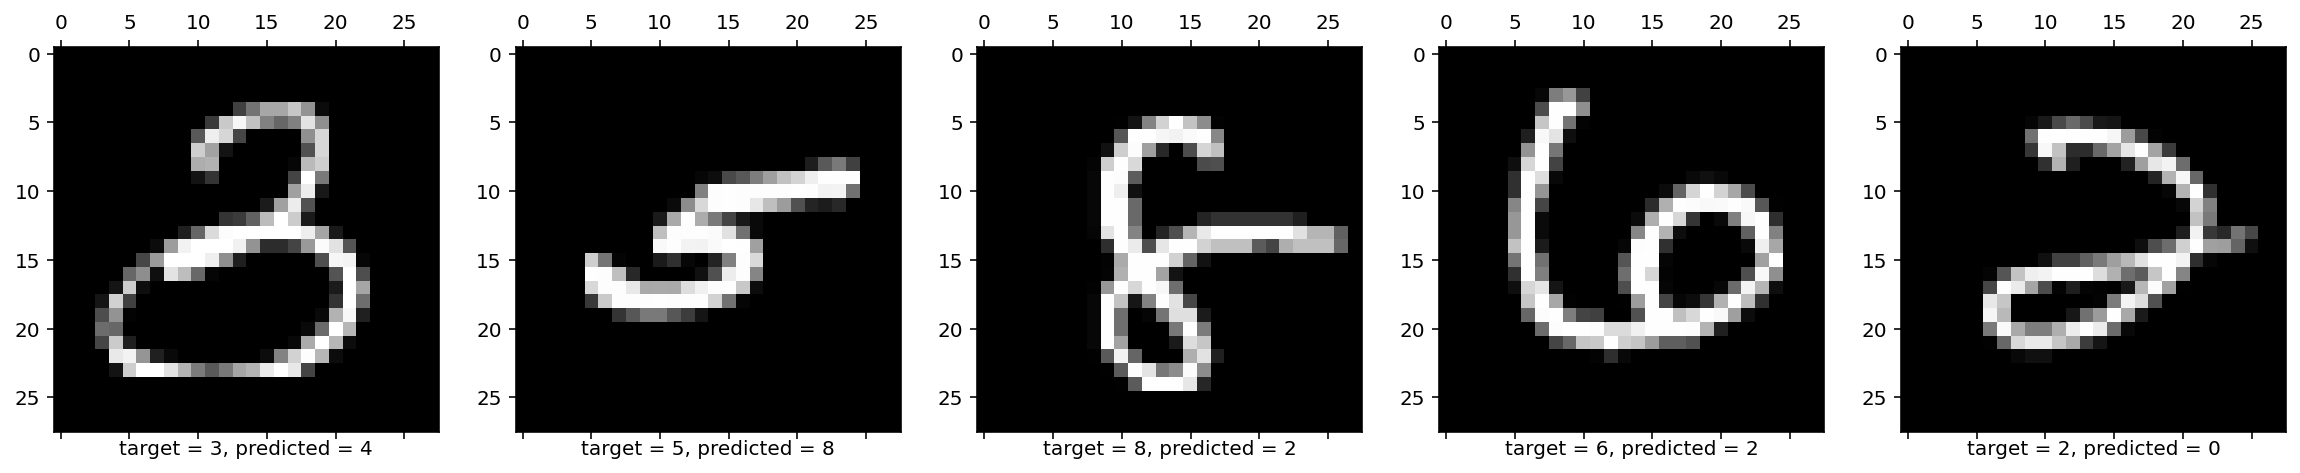

In [116]:
n=5
fig, ax = plt.subplots(1, n, figsize=(20, 4))
for i in range(n):
    ax[i].matshow(D[i].reshape(28, -1), cmap='gray')
    ax[i].set_xlabel(f'target = {dq.target.iloc[i]}, predicted = {dq.pred.iloc[i]}')